In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
import plumed
from scipy.interpolate import griddata
import nglview as ng
import MDAnalysis as mda

torch.manual_seed(42)

In [2]:
from skmatter.feature_selection import FPS

transitionAB1=plumed.read_as_pandas("./ABMD/COLVAR_flip_out1")
transitionAB2=plumed.read_as_pandas("./ABMD/COLVAR_flip_out2")
transitionAB3=plumed.read_as_pandas("./ABMD/COLVAR_flip_out3")

transitionBA1=plumed.read_as_pandas("./ABMD/COLVAR_flip_in1")
transitionBA2=plumed.read_as_pandas("./ABMD/COLVAR_flip_in2")
transitionBA3=plumed.read_as_pandas("./ABMD/COLVAR_flip_in3")

training_batches=np.vstack((transitionAB1.iloc[:,1:4],
                            transitionAB2.iloc[:,1:4],
                            transitionAB3.iloc[:,1:4],
                            transitionBA1.iloc[:,1:4],
                            transitionBA2.iloc[:,1:4],
                            transitionBA3.iloc[:,1:4])
                          )
   
print(training_batches.shape)
selector = FPS(n_to_select=1000,initialize=0)

selector.fit(training_batches[:,:3].T)
r_ndx=selector.selected_idx_

training_datapoints =training_batches[r_ndx,:]
training_datapoints.shape

(9878, 3)


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so" +++
+++ An error occurred. Message from dlopen(): /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so: undefined symbol: _ZN5torch3jit6MethodclESt6vectorIN3c106IValueESaIS4_EERKSt13unordered_mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEES4_St4hashISD_ESt8equal_toISD_ESaISt4pairIKSD_S4_EEE +++
+++ This error is expected if you are trying to load a kernel <=2.4
+++ Trying /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumed.so +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so" +++
+++ An error occurred. Message from dlopen(): /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so: undefined symbol: _ZN5torch3jit6MethodclESt6vectorIN3c106IValueESaIS4_EERKSt13unordered_mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEES4_St4hashISD_ESt

(1000, 3)

In [ ]:
import plotly.graph_objects as go

phi1=training_datapoints[:,0]
phi2=training_datapoints[:,1]
phi3=training_datapoints[:,2]


fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color='black',  
        opacity=0.5)
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


In [4]:
from skmatter.feature_selection import FPS

selector = FPS(n_to_select=300,initialize=0)

selector.fit(training_datapoints[:,:3].T)
r_ndx=selector.selected_idx_

model_datapoints =training_datapoints[r_ndx,:]

print(model_datapoints.shape)

(300, 3)


In [5]:
import plotly.graph_objects as go

phi1=model_datapoints[:,0]
phi2=model_datapoints[:,1]
phi3=model_datapoints[:,2]


fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color='black',  
        opacity=0.5)
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


In [6]:
colvar=plumed.read_as_pandas("COLVAR_stateA")

print(colvar['A8G24C25_cmap'].to_numpy())
print(colvar['A8G7C9_cmap'].to_numpy())
print(colvar['G7C9_cmap'].to_numpy())
print(colvar['hldaN'].to_numpy())
print(colvar['AWO'].to_numpy())

[4.1382]
[7.1411]
[15.568]
[-26.7914]
[7.6808]


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so" +++
+++ An error occurred. Message from dlopen(): /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so: undefined symbol: _ZN5torch3jit6MethodclESt6vectorIN3c106IValueESaIS4_EERKSt13unordered_mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEES4_St4hashISD_ESt8equal_toISD_ESaISt4pairIKSD_S4_EEE +++
+++ This error is expected if you are trying to load a kernel <=2.4
+++ Trying /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumed.so +++


In [7]:
labels = np.full(training_datapoints.shape[0], 2.0)

center1 = np.array([4, 7,15.5])
center2 = np.array([10, 15])
center3 = np.array([20, 33])

r1 = 1
r2 = 2
r3 = 5

distances_center1 = np.linalg.norm(training_datapoints[:,:3] - center1, axis=1)
distances_center2 = np.linalg.norm(training_datapoints[:,:2] - center2, axis=1)
distances_center3 = np.linalg.norm(training_datapoints[:,:2] - center3, axis=1)

indices_center1 = np.where(distances_center1 < r1)
labels[indices_center1] = 0

indices_center2 = np.where(distances_center2 < r2)
labels[indices_center2] = 0.5

indices_center3 = np.where(distances_center3 < r3)
labels[indices_center3] = 1


training_datapoints_labels=labels
training_datapoints_labels.shape

(1000,)

In [8]:
import plotly.graph_objects as go


phi1=training_datapoints[:,0]
phi2=training_datapoints[:,1]
phi3=training_datapoints[:,2]


fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,            
        colorscale='Electric',  
        opacity=0.5,
        colorbar=dict(title='label')
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


In [9]:
print(training_datapoints.shape)
print(model_datapoints.shape)
print(training_datapoints_labels.shape)

(1000, 3)
(300, 3)
(1000,)


In [10]:
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import Subset
from torch.utils.data.dataset import random_split

dataset = TensorDataset(torch.Tensor(training_datapoints), torch.Tensor(training_datapoints_labels))

device = torch.device("cpu")


torch.manual_seed(42)  
shuffle_dataset = True

dataset_size = len(dataset)
indices = list(range(dataset_size))
if shuffle_dataset:
    np.random.shuffle(indices)

# Split dataset into training and validation sets
train_size = int(0.8 * dataset_size)  # 80% for training, 20% for validation
val_size = dataset_size - train_size
train_indices, val_indices = indices[:train_size], indices[train_size:]
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)

# Define batch size for training
batch_size_train = 64

# Create DataLoader for training set
train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)

# Load entire validation dataset as one big batch
val_features = []
val_labels = []
for val_index in val_indices:
    feature, label = dataset[val_index]
    val_features.append(feature)
    val_labels.append(label)

val_features = torch.stack(val_features)  # Stack features into one big tensor
val_labels = torch.stack(val_labels)  # Stack labels into one big tensor

# Convert to tensor and move to device if necessary
val_features = val_features.to(device)
val_labels = val_labels.to(device)
val_features.shape

torch.Size([200, 3])

In [11]:
for batch_idx, (features, labels) in enumerate(train_loader):
    if batch_idx == 0 :
        print(features.shape)
        print(labels.shape)
batch_size_train*batch_idx

torch.Size([64, 3])
torch.Size([64])


768

In [12]:
print(train_dataset[:][0][:].shape)
print(train_dataset[:][1][:].shape)
print(val_dataset[:][0][:].shape)
print(val_dataset[:][1][:].shape)

torch.Size([800, 3])
torch.Size([800])
torch.Size([200, 3])
torch.Size([200])


In [13]:
class DeepLNE_CV(nn.Module):

    def __init__(self,
                ANN_layers: list,
                AutoEncoder_layers: list,
                f: int,
                d: int,
                n: int,
                ref: torch.Tensor,
                ref_z: torch.Tensor,
                act: str,
                z_lambda: float,
                device: str):
        

        super(DeepLNE_CV,self).__init__()
        
        # =======   LOSS  =======
        self.loss_mse = torch.nn.MSELoss()
        self.loss_ce = torch.nn.CrossEntropyLoss()
        

        # ======= BLOCKS =======
        
        self.n_features=f
        self.n_neighbors=n
        self.d_metric=d
        self.training_datapoints=ref
        self.training_datapoints_z=ref_z
        self.z_lambda=z_lambda
        
        self.device = torch.device(device)
        
        #print('Numer of input features:',self.n_features)
        #print('Numer of neighbors:',self.n_neighbors)
        #print('Dimension for nn search:',self.d_metric)
         
        if act == 'ReLU':
            self.activationf=torch.nn.ReLU()
        if act == 'Tanh':
            self.activationf=torch.nn.Tanh()
        if act == 'Sigmoid':
            self.activationf=torch.nn.Sigmoid()
        if act == 'ELU':
            self.activationf=torch.nn.ELU()
        if act == 'Softplus':    
            self.activationf=torch.nn.Softplus()
            
        self.ANNlayers = []
        
        self.ANNlayers.append(torch.nn.Linear(self.n_features, ANN_layers[0]))
        self.ANNlayers.append(self.activationf)
        
        for i in range(len(ANN_layers) - 1):
            self.ANNlayers.append(torch.nn.Linear(ANN_layers[i], ANN_layers[i + 1]))
            self.ANNlayers.append(self.activationf)

        self.ANNlayers.append(torch.nn.Linear(ANN_layers[-1], self.d_metric))
        
        self.metric = torch.nn.Sequential(*self.ANNlayers).to(self.device)
        #print('ANN architecture: ',self.metric)
            

        # initialize encoder
        self.AutoEncoderLayers = []
        
        self.AutoEncoderLayers.append(torch.nn.Linear(int(self.n_neighbors*self.d_metric), AutoEncoder_layers[0]))
        self.AutoEncoderLayers.append(self.activationf)
        
        for i in range(len(AutoEncoder_layers) - 1):
            self.AutoEncoderLayers.append(torch.nn.Linear(AutoEncoder_layers[i], AutoEncoder_layers[i + 1]))
            self.AutoEncoderLayers.append(self.activationf)

        self.AutoEncoderLayers.append(torch.nn.Linear(AutoEncoder_layers[-1], 1))
        self.AutoEncoderLayers.append(torch.nn.Sigmoid())

        self.encoder = torch.nn.Sequential(*self.AutoEncoderLayers).to(self.device)
        #print('Encoder architecture: ',self.encoder)
        
        # initialize decoder
        self.AutoDecoderLayers = []
        AutoDecoder_layers=AutoEncoder_layers[::-1]
        
        self.AutoDecoderLayers.append(torch.nn.Linear(1, AutoDecoder_layers[0]))
        self.AutoDecoderLayers.append(self.activationf)
        
        for i in range(len(AutoDecoder_layers) - 1):
            self.AutoDecoderLayers.append(torch.nn.Linear(AutoDecoder_layers[i], AutoDecoder_layers[i + 1]))
            self.AutoDecoderLayers.append(self.activationf)

        self.AutoDecoderLayers.append(torch.nn.Linear(AutoDecoder_layers[-1], self.n_features))

        self.decoder = torch.nn.Sequential(*self.AutoDecoderLayers).to(self.device)
        #print('Decoder architecture: ',self.decoder)
    
    def softmax_w(self,x: torch.Tensor, t=1e-1) -> torch.Tensor:
        x = x / t
        x = x - torch.max(x, dim=1, keepdim=True)[0]
        return (torch.exp(x)+1e-6) / torch.sum(torch.exp(x), dim=1, keepdim=True)
        

    def soft_top_k(self,x: torch.Tensor,t: torch.Tensor) -> torch.Tensor:
        y = torch.zeros_like(x)
            
        for k in range(self.n_neighbors):
            y.fill_diagonal_(1)
            x_w = x * (1 - y)
            x_w_softmax = self.softmax_w(x_w)
            y = y+x_w_softmax
            
            dm=torch.matmul(t.T,x_w_softmax.T)
            
            if k == 0:
                dn=dm
            else:
                dn=torch.cat((dn,dm))
        return dn.T

    def learn_metric(self,x: torch.Tensor) -> torch.Tensor:
        d=self.metric(x)
        t=self.metric(self.training_datapoints)
        return d,t
    
    def find_nearest_neighbors(self,x: torch.Tensor,t: torch.Tensor) -> torch.Tensor:
        
        dist = torch.cdist(x, t)
        dist=torch.exp(-dist)
        dn = self.soft_top_k(dist,t)
        
        return dn
        
    def encode(self,x: torch.Tensor) -> torch.Tensor:
        x=self.encoder(x)
        return x
    
    def decode(self,x: torch.Tensor) -> torch.Tensor:
        x=self.decoder(x)
        return x
    
    def encode_decode(self, x: torch.Tensor) -> torch.Tensor:
        d,t=self.learn_metric(x)
        dn=self.find_nearest_neighbors(d,t)
        
        s=self.encode(dn)
        x_hat=self.decode(s) 
        
        return x_hat,s,d,dn
    
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        d,t=self.learn_metric(x)
        dn=self.find_nearest_neighbors(d,t)
        s=self.encode(dn).reshape(-1,1)
        z=self.compute_z(x[:,:3]).reshape(-1,1) #self.compute_z(d).reshape(-1,1)
        
        out=torch.hstack((s,z))
        
        return out
    
    def compute_z(self,x: torch.Tensor) -> torch.Tensor:
        z_dist=torch.cdist(x,self.training_datapoints_z[:,:3])
        z_dist=torch.absolute(z_dist)
        z=(-1/self.z_lambda)*torch.log(torch.sum(torch.exp(-self.z_lambda*z_dist),axis=1))

        return z

In [14]:
device = torch.device("cuda") #("cpu") #("cuda")

training_datapoints=torch.Tensor(training_datapoints).to(device)
model_datapoints=torch.Tensor(model_datapoints).to(device)

ANN_architecture=[3]
AutoEncoder_architecture=[3]

n_features=3
d_metric=3
n_neighbors=3 
l=10

model = DeepLNE_CV(ANN_layers=ANN_architecture,
                   AutoEncoder_layers=AutoEncoder_architecture,
                   f=n_features,
                   d=d_metric,
                   n=n_neighbors,
                   ref=model_datapoints,
                   ref_z=model_datapoints,
                   act='Tanh',
                   z_lambda=l,
                   device=device)

optimizer = optim.Adam(model.parameters(), lr=0.001)


In [16]:
alpha=1e1
beta=1e-8


track_train = []
track_val = []
best_val_loss = float('inf')  

num_epochs = 5001
for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()  # Set the model to training mode
    for batch_idx, (features, labels) in enumerate(train_loader):
        # Prepare input and target data
        x = features.to(device)  
        l = labels.to(device) 
        
        # Forward Pass
        x_hat,s,d,dn = model.encode_decode(x)

        # Compute Loss
        reconstruction_loss = model.loss_mse(x_hat, x)
        
        ndx=torch.where(l!=2)[0]
        if len(ndx) > 0:
            multitask_loss = model.loss_mse(s.flatten()[ndx], l[ndx])
        else:
            multitask_loss = 0.0
        loss=reconstruction_loss+alpha*multitask_loss
        
        #L2 regularization
        for param in model.parameters():
            loss += beta * torch.norm(param, 2)

        # Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * x.size(0)

    train_loss = train_loss / batch_idx
    track_train.append(train_loss)
    
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        
        val_x = val_features.to(device)
        val_l = val_labels.to(device)

        # Forward Pass
        x_hat,s,d,dn = model.encode_decode(val_x)

        # Compute Loss
        reconstruction_loss = model.loss_mse(x_hat, val_x)
        
        ndx=torch.where(val_l!=2)[0]
        if len(ndx) > 0:
            multitask_loss = model.loss_mse(s.flatten()[ndx], val_l[ndx])
        else:
            multitask_loss = 0.0
        loss=reconstruction_loss+alpha*multitask_loss
        
    val_loss += loss.item() * val_x.size(0)

    track_val.append(val_loss)
    
    if epoch % 100 == 0:
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, val_loss))

    # Save the best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'model_teacher.pt')

    # Break early if necessary
    if train_loss < 1e-5:
        print(f"Converged at epoch {epoch}")
        break


Epoch: 0 	Training Loss: 298.473686 	Validation Loss: 793.507957
Epoch: 100 	Training Loss: 298.502206 	Validation Loss: 793.507957
Epoch: 200 	Training Loss: 298.522597 	Validation Loss: 793.507957
Epoch: 300 	Training Loss: 298.462574 	Validation Loss: 793.507957
Epoch: 400 	Training Loss: 298.475658 	Validation Loss: 793.507957
Epoch: 500 	Training Loss: 298.478523 	Validation Loss: 793.507957
Epoch: 600 	Training Loss: 298.428818 	Validation Loss: 793.507957
Epoch: 700 	Training Loss: 298.442077 	Validation Loss: 793.507957
Epoch: 800 	Training Loss: 298.451330 	Validation Loss: 793.507957
Epoch: 900 	Training Loss: 298.407621 	Validation Loss: 793.507957
Epoch: 1000 	Training Loss: 298.476546 	Validation Loss: 793.507957
Epoch: 1100 	Training Loss: 298.470442 	Validation Loss: 793.507957
Epoch: 1200 	Training Loss: 298.481542 	Validation Loss: 793.507957
Epoch: 1300 	Training Loss: 298.541288 	Validation Loss: 793.507957
Epoch: 1400 	Training Loss: 298.453164 	Validation Loss: 793

KeyboardInterrupt: 

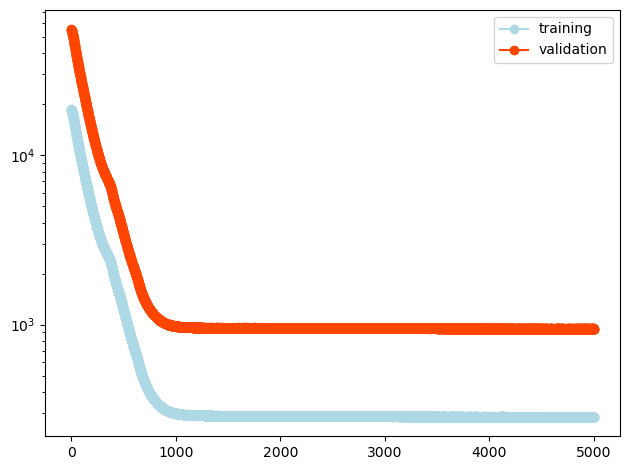

In [26]:
plt.figure()
plt.plot(track_train,'o-',color='lightblue',label='training')
plt.plot(track_val,'o-',color='orangered',label='validation')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

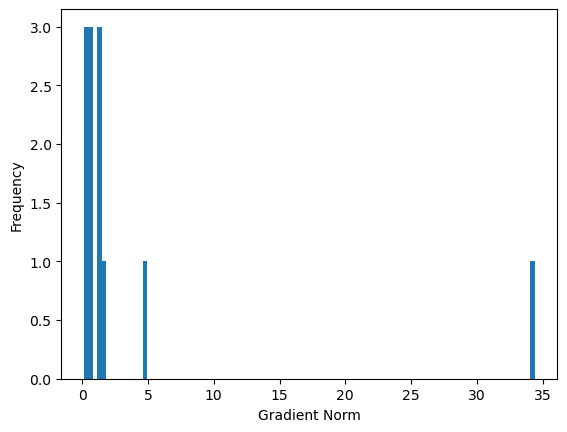

In [27]:
norms = []
for param in model.parameters():
    if param.grad is not None:
        norms.append(param.grad.norm().item())
plt.hist(norms, bins=100)
plt.xlabel('Gradient Norm')
plt.ylabel('Frequency')
plt.show()

In [15]:
device = torch.device("cpu")

training_datapoints=torch.Tensor(training_datapoints).to(device)
model_datapoints=torch.Tensor(model_datapoints).to(device)

ANN_architecture=[3]
AutoEncoder_architecture=[3] 

model = DeepLNE_CV(ANN_layers=ANN_architecture,
                   AutoEncoder_layers=AutoEncoder_architecture,
                   f=n_features,
                   d=d_metric,
                   n=n_neighbors,
                   ref=model_datapoints,
                   ref_z=model_datapoints,
                   act='Tanh',
                   z_lambda=l,
                   device=device)

model.load_state_dict(torch.load('model_teacher.pt'), strict=False)
model_datapoints_z=model.encode_decode(model_datapoints)[0].detach().numpy()

training_datapoints=torch.Tensor(training_datapoints)
model_datapoints=torch.Tensor(model_datapoints)
model_datapoints_z=torch.Tensor(model_datapoints_z)

ANN_architecture=[3]
AutoEncoder_architecture=[3] 

n_features=3
d_metric=3
n_neighbors=3
l=10 

plumed_model = DeepLNE_CV(ANN_layers=ANN_architecture,
                   AutoEncoder_layers=AutoEncoder_architecture,
                   f=n_features,
                   d=d_metric,
                   n=n_neighbors,
                   ref=model_datapoints,
                   ref_z=model_datapoints_z,
                   act='Tanh',
                   z_lambda=l,
                   device=device)

plumed_model.load_state_dict(torch.load('model_teacher.pt'), strict=False)

<All keys matched successfully>

In [57]:
m=torch.jit.trace(plumed_model,torch.ones(1,n_features))
m.save('model_teacher.ptc')

In [16]:
input=torch.Tensor(training_datapoints)

x_hat,s,d,dn = plumed_model.encode_decode(input)
x_hat=x_hat.detach().numpy()

out=plumed_model(input)
s = out[:,0]
z = out[:,1]
s=s.detach().numpy()
z=z.detach().numpy()
print(np.min(s),np.max(s))

0.044830922 0.995501


In [17]:
import plotly.graph_objects as go

labels=s

fig = go.Figure(data=go.Scatter3d(
    x=training_datapoints[:,0],
    y=training_datapoints[:,1],
    z=training_datapoints[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,            
        colorscale='electric', 
        opacity=0.2,
        colorbar=dict(title=r's')
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.add_trace(go.Scatter3d(
    x=x_hat[:,0],
    y=x_hat[:,1],
    z=x_hat[:,2],
    mode='markers',
    marker=dict(
        size=2,
        opacity=1
    ),
    name='xhat'
))



fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


In [18]:
import plotly.graph_objects as go

labels=z

fig = go.Figure(data=go.Scatter3d(
    x=training_datapoints[:,0],
    y=training_datapoints[:,1],
    z=training_datapoints[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,            
        colorscale='electric',  
        opacity=0.2,
        colorbar=dict(title=r'z')
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.add_trace(go.Scatter3d(
    x=x_hat[:,0],
    y=x_hat[:,1],
    z=x_hat[:,2],
    mode='markers',
    marker=dict(
        size=2,
        opacity=1
    ),
    name='xhat'
))



fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


torch.Size([588, 2])
torch.Size([588, 1])
torch.Size([588, 3])


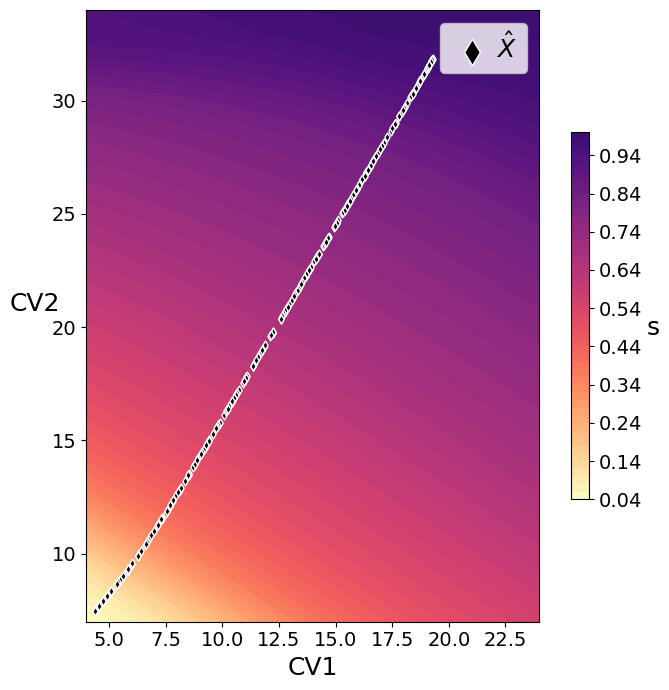

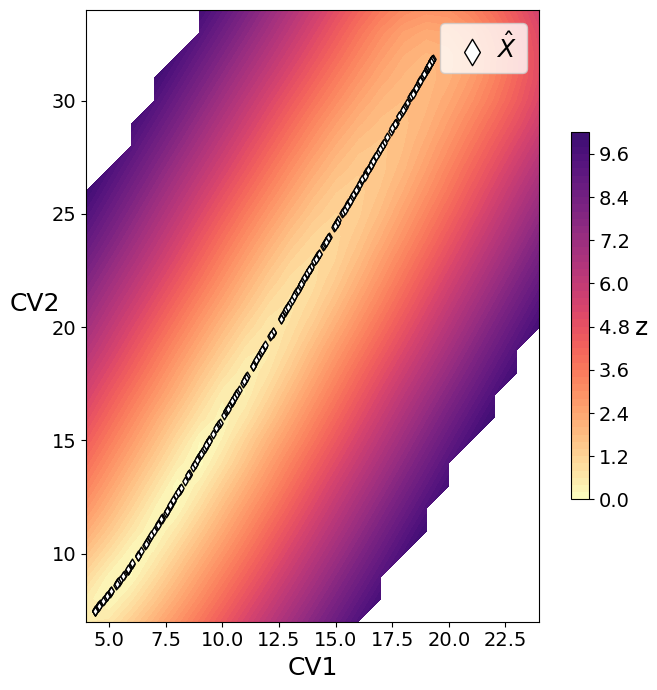

In [20]:
import matplotlib.colors as mcolors

input=model_datapoints
x_hat,s,d,dn=plumed_model.encode_decode(input)
x_hat=x_hat.detach().numpy()

x_range = np.arange(4, 25, 1)
y_range = np.arange(7, 35, 1)

x_grid, y_grid = np.meshgrid(x_range, y_range)

grid_points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

sample_grid=torch.Tensor(grid_points)
fill=torch.ones(sample_grid.shape[0],1)*16
print(sample_grid.shape)
print(fill.shape)

input=torch.hstack((sample_grid,fill))
print(input.shape)
out=plumed_model(input)
s = out[:,0]
z = out[:,1]
s=s.detach().numpy()
z=z.detach().numpy()


grid_x = grid_points[:, 0].reshape(x_grid.shape)  
grid_y = grid_points[:, 1].reshape(x_grid.shape)  
grid_s = s.reshape(x_grid.shape)  
grid_z = z.reshape(x_grid.shape)  

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256))) 


fig, ax = plt.subplots(1, figsize=(7,7))
contour2 = ax.contourf(grid_x,grid_y,grid_s,50,cmap=new_magma)
plt.scatter(x_hat[:,0], x_hat[:,1],color='black', s=20, marker='d',edgecolors='white',label=r'$\hat{X}$')
cbar = plt.colorbar(contour2,ax=ax, shrink=0.6)
cbar.set_label(r's', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'CV1',fontsize=18)
plt.ylabel(r'CV2',fontsize=18,rotation=0,labelpad=12)
ax.set_aspect('equal')
legend = plt.legend(loc='upper right', fontsize=18, markerscale=3, handlelength=1.75, handletextpad=0.1)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, figsize=(7,7))
contour2 = ax.contourf(grid_x,grid_y,grid_z,50,cmap=new_magma)
plt.scatter(x_hat[:,0], x_hat[:,1],color='white', s=20, marker='d',edgecolors='black',label=r'$\hat{X}$')
cbar = plt.colorbar(contour2,ax=ax, shrink=0.6)
cbar.set_label(r'z', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'CV1',fontsize=18)
plt.ylabel(r'CV2',fontsize=18,rotation=0,labelpad=12)
ax.set_aspect('equal')
legend = plt.legend(loc='upper right', fontsize=18, markerscale=3, handlelength=1.75, handletextpad=0.1)
plt.tight_layout()
plt.show()

torch.Size([588, 2])
torch.Size([588, 1])
torch.Size([588, 3])


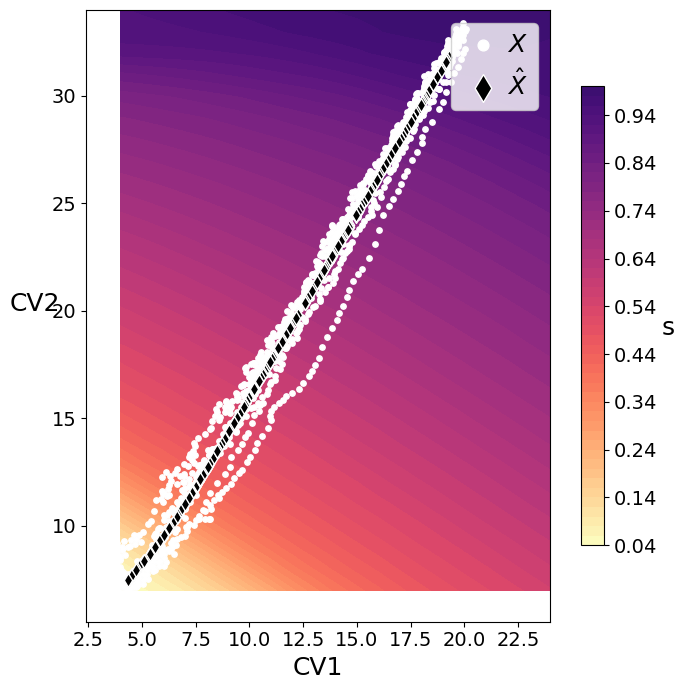

<Figure size 640x480 with 0 Axes>

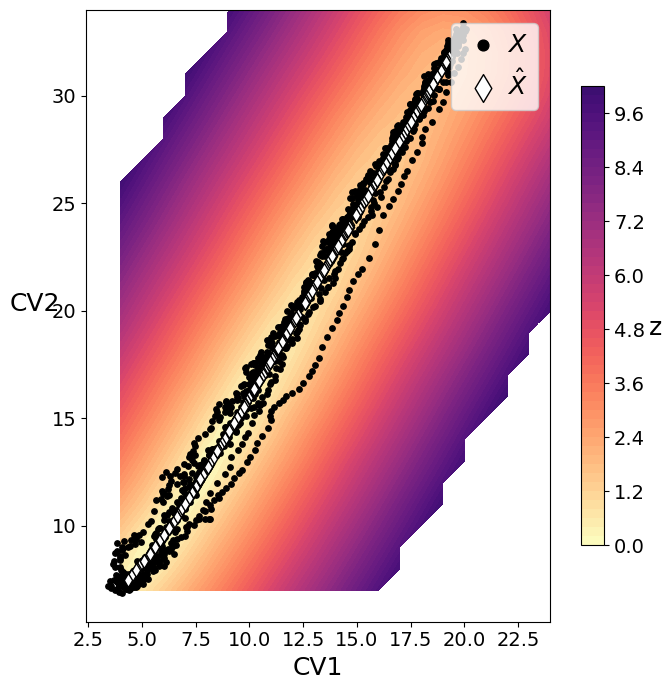

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.colors as mcolors

input=model_datapoints
x_hat,s,d,dn=plumed_model.encode_decode(input)
x_hat=x_hat.detach().numpy()

x_range = np.arange(4, 25, 1)
y_range = np.arange(7, 35, 1)

x_grid, y_grid = np.meshgrid(x_range, y_range)

grid_points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

sample_grid=torch.Tensor(grid_points)
fill=torch.ones(sample_grid.shape[0],1)*16
print(sample_grid.shape)
print(fill.shape)

input=torch.hstack((sample_grid,fill))
print(input.shape)
out=plumed_model(input)
s = out[:,0]
z = out[:,1]
s=s.detach().numpy()
z=z.detach().numpy() 

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  


fig, ax = plt.subplots(1, figsize=(7,7))
contour2 = ax.contourf(grid_x,grid_y,grid_s,50,cmap=new_magma)
plt.scatter(training_datapoints.detach().numpy()[:,0], training_datapoints.detach().numpy()[:,1],color='white', s=15, marker='o',label=r'$X$')
plt.scatter(x_hat[:,0], x_hat[:,1],color='black', s=50, marker='d',edgecolors='white',label=r'$\hat{X}$')
cbar = plt.colorbar(contour2,ax=ax, shrink=0.75)
cbar.set_label(r's', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'CV1',fontsize=18)
plt.ylabel(r'CV2',fontsize=18,rotation=0,labelpad=12)
ax.set_aspect('equal')
legend = plt.legend(loc='upper right', fontsize=18, markerscale=2, handlelength=1.75, handletextpad=0.1)
plt.tight_layout()
plt.show()
plt.draw()
fig.savefig('RNA_RatchetDatapoints_s.svg')
fig.savefig('RNA_RatchetDatapoints_s.png', dpi=100)

fig, ax = plt.subplots(1, figsize=(7,7))
contour2 = ax.contourf(grid_x,grid_y,grid_z,50,cmap=new_magma)

plt.scatter(training_datapoints.detach().numpy()[:,0], training_datapoints.detach().numpy()[:,1],color='black', s=15, marker='o',label=r'$X$')
plt.scatter(x_hat[:,0], x_hat[:,1],color='white', s=50, marker='d',edgecolors='black',label=r'$\hat{X}$')
cbar = plt.colorbar(contour2,ax=ax, shrink=0.75)
cbar.set_label(r'z', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'CV1',fontsize=18)
plt.ylabel(r'CV2',fontsize=18,rotation=0,labelpad=12)
ax.set_aspect('equal')
legend = plt.legend(loc='upper right', fontsize=18, markerscale=2, handlelength=1.75, handletextpad=0.1)
plt.tight_layout()
plt.show()
plt.draw()
fig.savefig('RNA_RatchetDatapoints_z.svg')
fig.savefig('RNA_RatchetDatapoints_z.png', dpi=100)

In [25]:
feature_names=transitionAB1.columns[[1,2,3]]
# parameters
multiply_by_stddev = False #whether to multiply derivatives by std dev of inputs
order_by_importance = True #plot results ordered by importance

input_names = feature_names
print(input_names,len(input_names))

n_input = len(input_names)

#init arrays
in_num=np.arange(n_input)
rank=torch.zeros(n_input)

X=training_datapoints
#compute input std dev
if multiply_by_stddev:
    in_std=torch.std(torch.Tensor(X),axis=0).numpy()
    
for iteration,x_i in enumerate(X):    

    x_i = torch.Tensor(x_i.reshape(1,-1))
    x_i.requires_grad=True
    # calculate cv 
    s_i,z_i = plumed_model(x_i)[0]
    # calculate derivatives
    grad_i = torch.autograd.grad(s_i,x_i)
    rank += grad_i[0].reshape(-1).abs()

    if iteration%100==0:
        print(iteration)

rank = rank.numpy()

#multiply by std dev
if multiply_by_stddev:
    rank = rank * in_std

#normalize to 1
rank/= np.sum(rank)

#sort
if order_by_importance:
    index= rank.argsort()
    input_names = input_names[index]
    rank = rank[index]

Index(['A8G24C25_cmap', 'A8G7C9_cmap', 'G7C9_cmap'], dtype='object') 3
0
100
200
300
400
500
600
700
800
900


/tmp/ipykernel_2040857/896391863.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



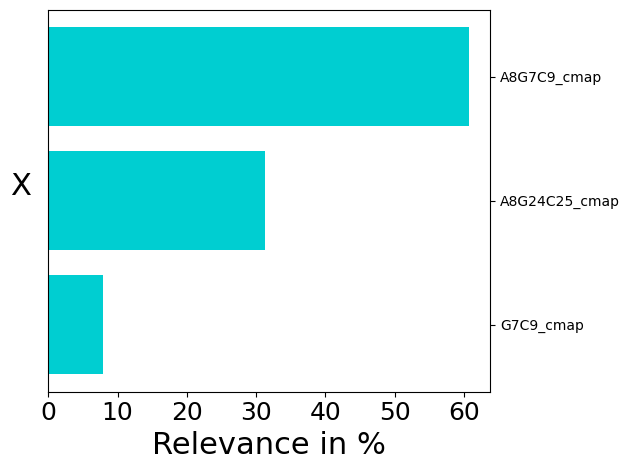

In [26]:
fig=plt.figure()
    
ax = fig.add_subplot(111)
ax.barh(in_num, rank*100, color='#00CED1', linewidth=0.3)

ax.set_yticklabels(input_names,fontsize=18)

ax.set_xlabel(r'Relevance in %',fontsize=22)
ax.set_ylabel('X',rotation=0,fontsize=22, labelpad=20)
ax.set_yticks(in_num)
ax.yaxis.tick_right()
plt.xticks(fontsize=18)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()    

In [19]:
u = mda.Universe('md_0.gro')
print(len(u.trajectory))
nucleic = u.select_atoms('nucleic')
A8_flipping_base = nucleic.select_atoms(f"resid {8} and name C* N* O* P*")
A8_flipping_base_CN = nucleic.select_atoms(f"resid {8} and (name N1 N3 N6 C6 C2)")
C9_neighbor = nucleic.select_atoms(f"resid {9} and name C2 C4 C5 C6 C8 C1' C2' O4'")
G7_neighbor = nucleic.select_atoms(f"resid {7} and name C2 C4 C5 C6 C8 C1' C2' O4'")
C9_neighbor_base = nucleic.select_atoms(f"resid {9} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")
G7_neighbor_base = nucleic.select_atoms(f"resid {7} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")
G24_neighbor = nucleic.select_atoms(f"resid {24} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")
C25_neighbor = nucleic.select_atoms(f"resid {25} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")

print(A8_flipping_base[0])
print(A8_flipping_base_CN[0])
print(C9_neighbor[0])
print(G7_neighbor[0])
print(C9_neighbor_base[0])
print(G7_neighbor_base[0])
print(G24_neighbor[0])
print(C25_neighbor[0])

1
<Atom 225: P of type P of resname A, resid 8 and segid SYSTEM>
<Atom 242: C6 of type C of resname A, resid 8 and segid SYSTEM>
<Atom 267: O4' of type O of resname C, resid 9 and segid SYSTEM>
<Atom 200: O4' of type O of resname G, resid 7 and segid SYSTEM>
<Atom 270: N1 of type N of resname C, resid 9 and segid SYSTEM>
<Atom 203: N9 of type N of resname G, resid 7 and segid SYSTEM>
<Atom 744: N9 of type N of resname G, resid 24 and segid SYSTEM>
<Atom 778: N1 of type N of resname C, resid 25 and segid SYSTEM>


In [20]:
def get_atom_pairs_within_cutoff(atom_list1, atom_list2, cutoff):
    pairs_within_cutoff = []
    
    for i in range(len(atom_list1)):
        atom_i = str(atom_list1[i].id)
        
        for j in range(len(atom_list2)):
            atom_j = str(atom_list2[j].id)
            
            distance = np.linalg.norm(atom_list1[i].position - atom_list2[j].position)
            
            if distance <= cutoff:
                pairs_within_cutoff.append((atom_i, atom_j, distance))
                
    return np.array(pairs_within_cutoff)

A8G24_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,G24_neighbor,5)
A8C25_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,C25_neighbor,4)
A8G24C25_cmap=np.vstack((A8G24_cmap,A8C25_cmap))
G7C9_cmap=get_atom_pairs_within_cutoff(G7_neighbor,C9_neighbor,8.5)
A8G7_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,C9_neighbor_base,4)
A8C9_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,G7_neighbor_base,4)
A8G7C9_cmap=np.vstack((A8G7_cmap,A8C9_cmap))

print(A8G24_cmap.shape)
print(A8C25_cmap.shape)
print(A8G24C25_cmap.shape)
print(G7C9_cmap.shape)
print(A8G7_cmap.shape)
print(A8C9_cmap.shape)
print(A8G7C9_cmap.shape)

(6, 3)
(4, 3)
(10, 3)
(20, 3)
(12, 3)
(8, 3)
(20, 3)


In [48]:
!scp model_teacher.ptc ./ReinforcementLearning

In [47]:
!scp ./ABMD/md_0.gro ./ReinforcementLearning
!scp ./ABMD/md_prod.mdp ./ReinforcementLearning
!scp ./ABMD/topol.top ./ReinforcementLearning
!scp ./ABMD/index.ndx ./ReinforcementLearning
!scp ./ABMD/flip_out1.pdb ./ReinforcementLearning

In [49]:
%%bash 
gmx_mpi grompp -f ./ReinforcementLearning/md_prod.mdp -c ./ReinforcementLearning/flip_out1.pdb -p ./ReinforcementLearning/topol.top -n ./ReinforcementLearning/index.ndx -o ./ReinforcementLearning/MD.tpr 

             :-) GROMACS - gmx grompp, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Projects/TransitionPathSampling_DeepLNE/Publication_Toymodels/RNA
Command line:
  gmx_mpi grompp -f ./ReinforcementLearning/md_prod.mdp -c ./ReinforcementLearning/flip_out1.pdb -p ./ReinforcementLearning/topol.top -n ./ReinforcementLearning/index.ndx -o ./ReinforcementLearning/MD.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ./ReinforcementLearning/md_prod.mdp]:
  leapfrog does not yet support Nose-Hoover chains, nhchainlength reset to 1

Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group System is 69506.00

There was 1 note

Back Off! I just backed up ./ReinforcementLearning/MD.tpr to ./ReinforcementLearning/

Setting the LD random seed to -1133127445

Generated 666 of the 666 non-bonded parameter combinations

Generated 666 of the 666 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Na+'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'WAT'

turning H bonds into constraints...

Cleaning up constraints and constant bonded interactions with virtual sites

The largest distance between excluded atoms is 0.413 nm

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.037 nm, buffer size 0.037 nm

Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm

Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 52x52x52, spacing 0.150 0.150 0.150

Estimate for the relative computational

In [40]:
lines=[]

#------------------------------------- additional CVs to track ---------------------------------------
lines.append("""

d1: DISTANCE ATOMS=243,751 #A-G
d2: DISTANCE ATOMS=243,784 #A-C
d3: DISTANCE ATOMS=243,787 #A-C
d4: DISTANCE ATOMS=243,794 #A-RIB
d5: DISTANCE ATOMS=243,800 #A-O
d6: DISTANCE ATOMS=246,751 #A-G
d7: DISTANCE ATOMS=246,784 #A-C
d8: DISTANCE ATOMS=246,787 #A-C
d9: DISTANCE ATOMS=246,794 #A-RIB
d10: DISTANCE ATOMS=246,800 #A-O

d1n: CUSTOM ARG=d1 FUNC=x/2.11 PERIODIC=NO
d2n: CUSTOM ARG=d2 FUNC=x/2.25 PERIODIC=NO
d3n: CUSTOM ARG=d3 FUNC=x/2.17 PERIODIC=NO
d4n: CUSTOM ARG=d4 FUNC=x/2.53 PERIODIC=NO
d5n: CUSTOM ARG=d5 FUNC=x/2.78 PERIODIC=NO
d6n: CUSTOM ARG=d6 FUNC=x/2.07 PERIODIC=NO
d7n: CUSTOM ARG=d7 FUNC=x/2.22 PERIODIC=NO
d8n: CUSTOM ARG=d8 FUNC=x/2.13 PERIODIC=NO
d9n: CUSTOM ARG=d1 FUNC=x/2.49 PERIODIC=NO
d10n: CUSTOM ARG=d10 FUNC=x/2.71 PERIODIC=NO


#hlda: COMBINE ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10 COEFFICIENTS=-14.815268,-15.319241,-13.384423,-7.26893,-7.971926,-16.557427,-14.808337,-14.668623,-9.334746,-9.811748 PERIODIC=NO
hldaN: COMBINE ARG=d1n,d2n,d3n,d4n,d5n,d6n,d7n,d8n,d9n,d10n COEFFICIENTS=-11.63344,-11.311855,-12.316635,-10.216072,-10.565613,-10.745473,-9.307333,-11.834765,-11.317639,-12.201419 PERIODIC=NO

WO: GROUP ATOMS=1020-45543:4 # water molecules
AWO: COORDINATION GROUPA=243 GROUPB=WO SWITCH={RATIONAL D_0=0.0 R_0=0.35 NN=6 MM=10} NLIST NL_CUTOFF=2.0 NL_STRIDE=20

t1: TORSION ATOMS=225,228,229,232 #A, P-O-C-C
t2: TORSION ATOMS=228,229,232,251 #A, O-C-C-C
t3: TORSION ATOMS=229,232,251,257 #A C-C-C_O
t4: TORSION ATOMS=232,251,257,258 #A C-C-O-P
t5: TORSION ATOMS=251,257,258,261 #A C-O-P-O
t6: TORSION ATOMS=257,258,261,262 #A-C  O-P-O-C
t7: TORSION ATOMS=258,261,262,265 #C P-O-C-C
t8: TORSION ATOMS=261,262,265,282 #C O-C-C-C
t9: TORSION ATOMS=262,265,282,288 #C C-C-C-O
t10: TORSION ATOMS=265,282,288,289 #C C-C-O-P

t-1: TORSION ATOMS=218,224,225,228 #G-A C-O-P-O
t-2: TORSION ATOMS=198,218,224,225 #G-A C-C-O-P
    
""")
             
#----------------------------------------------------------------------------------------------


features=[]

temp=[]
for e,elem in enumerate(A8G24C25_cmap):
    lines.append('dA8G24C25_%s: DISTANCE ATOMS=%s,%s \n'%(e+1,elem[0],elem[1]))
    temp.append('dA8G24C25_%s' %(e+1))

temp = ','.join(temp)              
lines.append('A8G24C25_cmap: COMBINE ARG=%s PERIODIC=NO \n' %temp)
features.append('A8G24C25_cmap')

temp=[]
for e,elem in enumerate(A8G7C9_cmap):
    lines.append('dA8G7C9_%s: DISTANCE ATOMS=%s,%s \n'%(e+1,elem[0],elem[1]))
    temp.append('dA8G7C9_%s' %(e+1))

temp = ','.join(temp)              
lines.append('A8G7C9_cmap: COMBINE ARG=%s PERIODIC=NO \n' %temp)
features.append('A8G7C9_cmap')

temp=[]
for e,elem in enumerate(G7C9_cmap):
    lines.append('dG7C9_%s: DISTANCE ATOMS=%s,%s \n'%(e+1,elem[0],elem[1]))
    temp.append('dG7C9_%s' %(e+1))

temp = ','.join(temp)              
lines.append('G7C9_cmap: COMBINE ARG=%s PERIODIC=NO \n' %temp)
features.append('G7C9_cmap')

features= ','.join(features)  

lines.append('model: PYTORCH_MODEL FILE=model_teacher.ptc ARG=%s \n' %features)

    
lines.append('OPES_METAD_EXPLORE ...\n')
lines.append('  LABEL=opes\n')
lines.append('  ARG=model.node-0,model.node-1\n')
lines.append('  FILE=Kernels.data\n')
lines.append('  STATE_RFILE=compressed.Kernels\n')
lines.append('  STATE_WFILE=compressed.Kernels\n')
lines.append('  STATE_WSTRIDE=500000\n')
lines.append('  PACE=500\n')
lines.append('  BARRIER=60\n')
lines.append('  SIGMA=0.1,1.0\n')
lines.append('... OPES_METAD_EXPLORE\n')

lines.append('uwall_z: UPPER_WALLS ARG=model.node-1 KAPPA=500 AT=10\n')

CV_print=['A8G24C25_cmap','A8G7C9_cmap','G7C9_cmap','hldaN','AWO','t2','t3','t4','t5','t6','model.node-0','model.node-1','opes.bias']
CV_print= ','.join(CV_print)  
lines.append('PRINT FMT=%s STRIDE=500 FILE=COLVAR ARG=%s \n' %('%8.4f',CV_print))


f = open("ReinforcementLearning/plumed.dat", "w")
for elem in lines:
    f.writelines(elem)
f.close()

In [43]:
%%bash 
cat > ReinforcementLearning/run.sh << EOF
export OMP_NUM_THREADS=8
mpirun -n 2 gmx_mpi mdrun -deffnm MD -plumed plumed.dat -pin on -pinoffset 0 -notunepme -nsteps 10000000 -nb gpu &
EOF

In [21]:
!find . -type f -name "#*" -exec rm -rf {} +
!find . -type f -name "step*" -exec rm -rf {} +
!find . -type f -name "bck*" -exec rm -rf {} +

In [21]:
colvar=plumed.read_as_pandas("ReinforcementLearning/COLVAR")
colvar

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so" +++
+++ An error occurred. Message from dlopen(): /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so: undefined symbol: _ZN5torch3jit6MethodclESt6vectorIN3c106IValueESaIS4_EERKSt13unordered_mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEES4_St4hashISD_ESt8equal_toISD_ESaISt4pairIKSD_S4_EEE +++
+++ This error is expected if you are trying to load a kernel <=2.4
+++ Trying /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumed.so +++


time  A8G24C25_cmap  A8G7C9_cmap  G7C9_cmap     hldaN      AWO  \
0        0.0        19.9650      32.9555    14.2791 -102.9206  14.6284   
1        1.0        19.3331      31.8537    13.5986  -99.4920  13.5967   
2        2.0        18.9138      31.3457    13.0707  -98.3822  13.8420   
3        3.0        18.6212      30.5628    12.5850  -97.1158  14.8849   
4        4.0        19.4624      32.2659    13.1706 -100.5416  14.3150   
...      ...            ...          ...        ...       ...      ...   
9696  9696.0         6.0439      10.5428    23.3505  -31.0997   9.5458   
9697  9697.0         5.7958      10.6472    22.8379  -32.3466  10.4437   
9698  9698.0         5.3727      10.5222    22.7746  -30.3008   9.6073   
9699  9699.0         5.2285      10.2673    22.3299  -28.5584   8.9133   
9700  9700.0         5.1223      10.5063    22.6205  -28.1452   9.4898   

          t2      t3      t4      t5      t6  model.node-0  model.node-1  \
0     1.0342  1.9862 -2.7735  1.4177 -1.1028        0.9862        1.2101   
1     1.1315  2.0421 -2.6741  1.3395 -1.6471        0.9804       -0.0718   
2     0.9052  2.4199 -2.5316  0.8660 -1.7327        0.9736        0.4711   
3     0.7265  2.6664 -2.6355  0.9981 -1.9138        0.9569        1.0702   
4     0.8965  2.3124 -2.8121  1.3612 -1.4183        0.9846        0.5230   
...      ...     ...     ...     ...     ...           ...           ...   
9696  1.1136  2.4867 -2.5055 -3.0812  1.4241        0.2718        6.9471   
9697  1.1801  2.4610 -2.4933 -3.0386  1.2655        0.2697        6.4654   
9698  1.2173  2.5320 -2.2852 -2.9816  1.5254        0.2416        6.4483   
9699  1.1062  2.2878 -1.7946 -3.0965  1.2573        0.2185        6.0175   
9700  1.0739  2.3160 -2.2011  3.1118  1.1929        0.2297        6.3367   

      opes.bias  
0      -60.0000  
1      -60.0000  
2       17.0210  
3       16.4456  
4       17.3248  
...         ...  
9696   -11.9703  
9697    -5.4208  
9698   -10.1056  
9699    -6.8589  
9700   -10.1949  

[9701 rows x 14 columns]

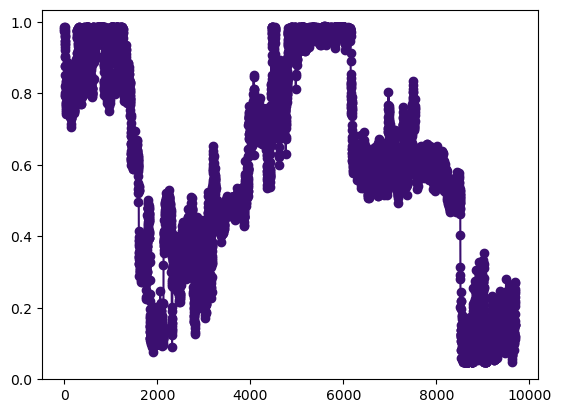

In [22]:
import matplotlib.colors as mcolors

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  
norm = mcolors.Normalize(vmin=0, vmax=10)

plt.plot(colvar['model.node-0'],'o-',color=magma(norm(8)))

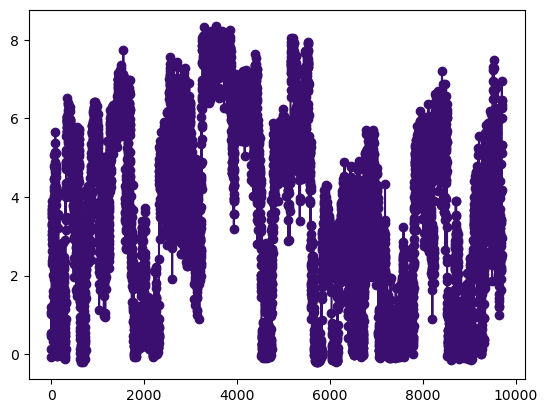

In [23]:
import matplotlib.colors as mcolors

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  
norm = mcolors.Normalize(vmin=0, vmax=10)

plt.plot(colvar['model.node-1'],'o-',color=magma(norm(8)))

In [25]:
import plotly.graph_objects as go
colvar=plumed.read_as_pandas("ReinforcementLearning/COLVAR")

skip=1


phi1=colvar.iloc[::skip,1]
phi2=colvar.iloc[::skip,2]
phi3=colvar.iloc[::skip,3]
labels=colvar.iloc[::skip,11]

fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,            
        colorscale='Electric_r',  
        opacity=0.5,
        colorbar=dict(title='s')
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so" +++
+++ An error occurred. Message from dlopen(): /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so: undefined symbol: _ZN5torch3jit6MethodclESt6vectorIN3c106IValueESaIS4_EERKSt13unordered_mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEES4_St4hashISD_ESt8equal_toISD_ESaISt4pairIKSD_S4_EEE +++
+++ This error is expected if you are trying to load a kernel <=2.4
+++ Trying /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumed.so +++


In [26]:
import plotly.graph_objects as go
colvar=plumed.read_as_pandas("ReinforcementLearning/COLVAR")

skip=1

phi1=colvar.iloc[::skip,1]
phi2=colvar.iloc[::skip,2]
phi3=colvar.iloc[::skip,3]
labels=colvar.iloc[::skip,12]

fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,            
        colorscale='Electric_r',  
        opacity=0.5,
        colorbar=dict(title='z')
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so" +++
+++ An error occurred. Message from dlopen(): /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so: undefined symbol: _ZN5torch3jit6MethodclESt6vectorIN3c106IValueESaIS4_EERKSt13unordered_mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEES4_St4hashISD_ESt8equal_toISD_ESaISt4pairIKSD_S4_EEE +++
+++ This error is expected if you are trying to load a kernel <=2.4
+++ Trying /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumed.so +++


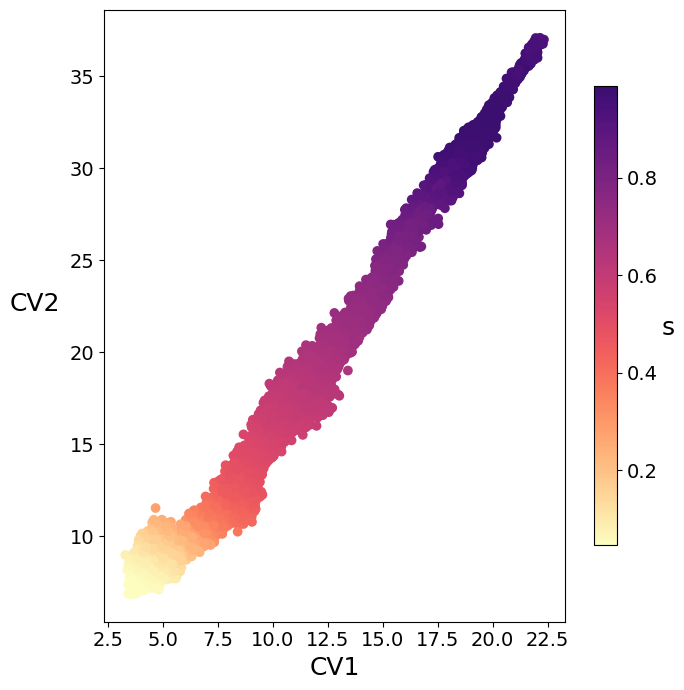

In [27]:
import matplotlib.colors as mcolors

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  

skip=1

fig, ax = plt.subplots(1, figsize=(7,7))
contour2=plt.scatter(colvar.iloc[::skip,1],colvar.iloc[::skip,2],c=colvar.iloc[::skip,11],cmap=new_magma)

cbar = plt.colorbar(contour2,ax=ax, shrink=0.75)
cbar.set_label(r's', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'CV1',fontsize=18)
plt.ylabel(r'CV2',fontsize=18,rotation=0,labelpad=25)

plt.tight_layout()
plt.show()

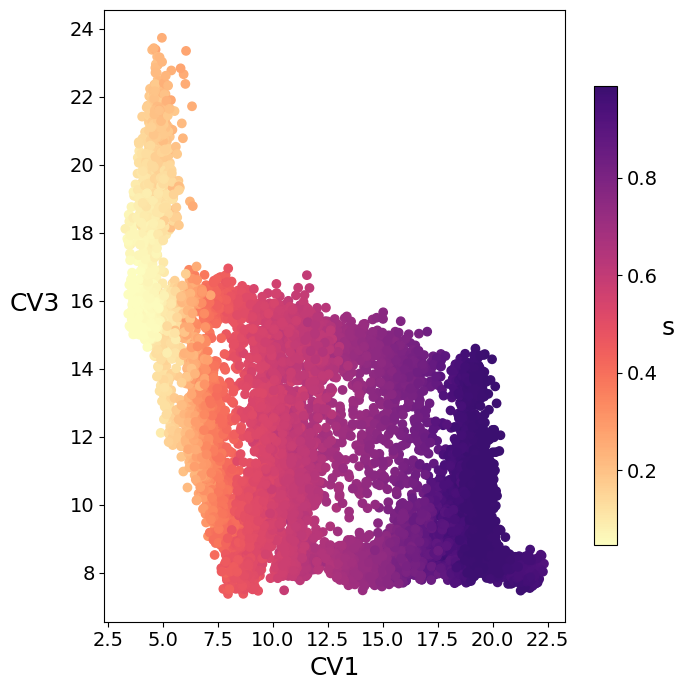

In [28]:
import matplotlib.colors as mcolors

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  

skip=1

fig, ax = plt.subplots(1, figsize=(7,7))
contour2=plt.scatter(colvar.iloc[::skip,1],colvar.iloc[::skip,3],c=colvar.iloc[::skip,11],cmap=new_magma)

cbar = plt.colorbar(contour2,ax=ax, shrink=0.75)
cbar.set_label(r's', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'CV1',fontsize=18)
plt.ylabel(r'CV3',fontsize=18,rotation=0,labelpad=25)

plt.tight_layout()
plt.show()

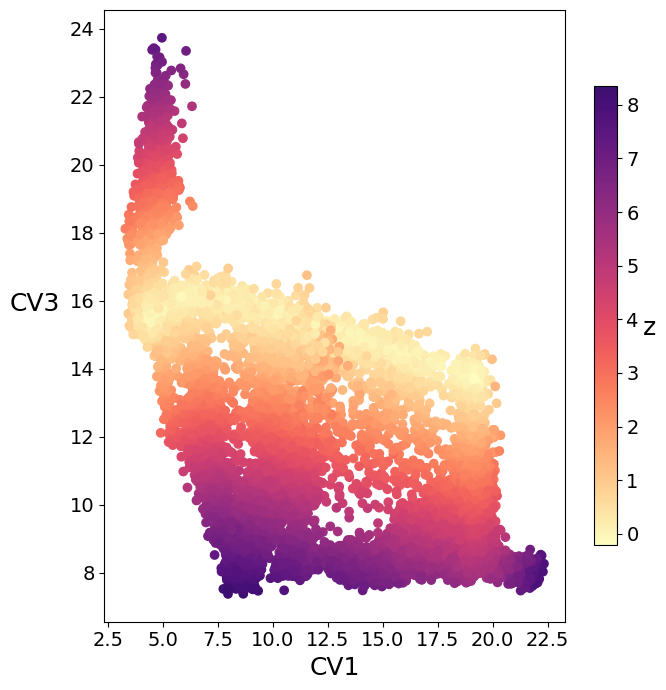

In [29]:
import matplotlib.colors as mcolors

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  

skip=1

fig, ax = plt.subplots(1, figsize=(7,7))
contour2=plt.scatter(colvar.iloc[::skip,1],colvar.iloc[::skip,3],c=colvar.iloc[::skip,12],cmap=new_magma)

cbar = plt.colorbar(contour2,ax=ax, shrink=0.75)
cbar.set_label(r'z', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'CV1',fontsize=18)
plt.ylabel(r'CV3',fontsize=18,rotation=0,labelpad=25)

plt.tight_layout()
plt.show()

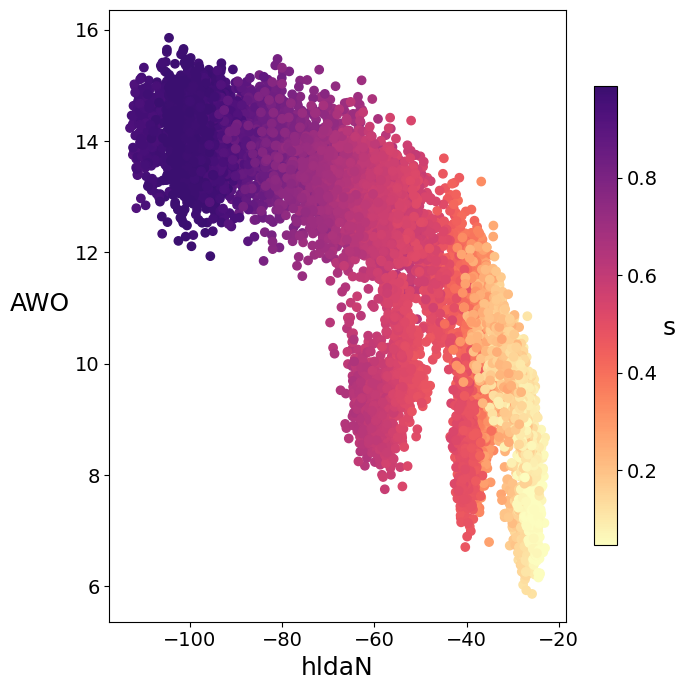

In [30]:
import matplotlib.colors as mcolors

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  

skip=1

fig, ax = plt.subplots(1, figsize=(7,7))
contour2=plt.scatter(colvar.iloc[::skip,4],colvar.iloc[::skip,5],c=colvar.iloc[::skip,11],cmap=new_magma)

cbar = plt.colorbar(contour2,ax=ax, shrink=0.75)
cbar.set_label(r's', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'hldaN',fontsize=18)
plt.ylabel(r'AWO',fontsize=18,rotation=0,labelpad=25)

plt.tight_layout()
plt.show()

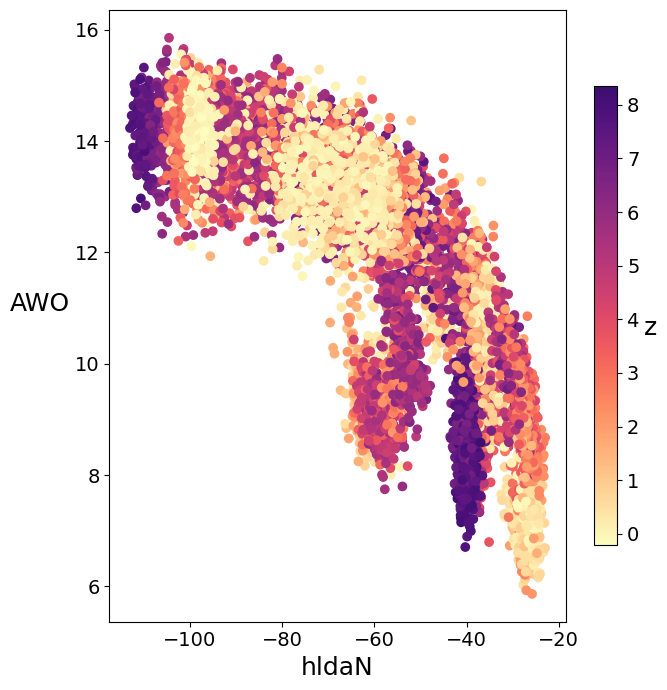

In [31]:
import matplotlib.colors as mcolors

magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256))) 

skip=1

fig, ax = plt.subplots(1, figsize=(7,7))
contour2=plt.scatter(colvar.iloc[::skip,4],colvar.iloc[::skip,5],c=colvar.iloc[::skip,12],cmap=new_magma)

cbar = plt.colorbar(contour2,ax=ax, shrink=0.75)
cbar.set_label(r'z', rotation=0, labelpad=8,fontsize=18)
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'hldaN',fontsize=18)
plt.ylabel(r'AWO',fontsize=18,rotation=0,labelpad=25)

plt.tight_layout()
plt.show()

In [24]:
colvar=plumed.read_as_pandas("./ReinforcementLearning/COLVAR")
reinforcement_data=colvar.iloc[:,1:4].to_numpy()

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so" +++
+++ An error occurred. Message from dlopen(): /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumedKernel.so: undefined symbol: _ZN5torch3jit6MethodclESt6vectorIN3c106IValueESaIS4_EERKSt13unordered_mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEES4_St4hashISD_ESt8equal_toISD_ESaISt4pairIKSD_S4_EEE +++
+++ This error is expected if you are trying to load a kernel <=2.4
+++ Trying /home/rizziv@farma.unige.ch/plumed2-2.9/src/lib/libplumed.so +++


In [25]:
from skmatter.feature_selection import FPS

selector = FPS(n_to_select=500,initialize=0)

selector.fit(reinforcement_data[:,:3].T)
r_ndx=selector.selected_idx_
reinforcement_data_FPS = reinforcement_data[r_ndx]

print(reinforcement_data_FPS.shape)

(500, 3)


In [26]:
import plotly.graph_objects as go

phi1=reinforcement_data_FPS[:,0]
phi2=reinforcement_data_FPS[:,1]
phi3=reinforcement_data_FPS[:,2]


fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color='black',  
        opacity=0.5)
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


In [27]:
student_training_datapoints=np.vstack((training_datapoints,reinforcement_data_FPS))
print(student_training_datapoints.shape)

(1500, 3)


In [28]:
device = torch.device("cpu")

ANN_architecture=[3]
AutoEncoder_architecture=[3] 

n_features=3
d_metric=3
n_neighbors=3
l=1e0

plumed_model = DeepLNE_CV(ANN_layers=ANN_architecture,
                   AutoEncoder_layers=AutoEncoder_architecture,
                   f=n_features,
                   d=d_metric,
                   n=n_neighbors,
                   ref=model_datapoints,
                   ref_z=model_datapoints_z,
                   act='Tanh',
                   z_lambda=l,
                   device=device)

plumed_model.load_state_dict(torch.load('model_teacher.pt'), strict=False)

input_new=torch.Tensor(student_training_datapoints)

x_hat_new,s_new,d_new,dn_new = plumed_model.encode_decode(input_new)
x_hat_new=x_hat_new.detach().numpy()


out_new=plumed_model(input_new)
s_new = out_new[:,0]
z_new = out_new[:,1]
s_new=s_new.detach().numpy()
z_new=z_new.detach().numpy()

In [37]:
import plotly.graph_objects as go


phi1=student_training_datapoints[:,0]
phi2=student_training_datapoints[:,1]
phi3=student_training_datapoints[:,2]
labels=s_new

fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,            
        colorscale='Electric_r',  
        opacity=0.5,
        colorbar=dict(title='s')
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


In [38]:
import plotly.graph_objects as go


phi1=student_training_datapoints[:,0]
phi2=student_training_datapoints[:,1]
phi3=student_training_datapoints[:,2]
labels=z_new

fig = go.Figure(data=go.Scatter3d(
    x=phi1[:],
    y=phi2[:],
    z=phi3[:],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,            
        colorscale='Electric_r',  
        opacity=0.5,
        colorbar=dict(title='s')
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor='#CCCCCC'),
        yaxis=dict(backgroundcolor='#CCCCCC'),
        zaxis=dict(backgroundcolor='#CCCCCC', gridcolor='rgba(0, 0, 0, 0)')
    )
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title=r'CV1'),
        yaxis=dict(title=r'CV2'),
        zaxis=dict(title=r'CV3')
    )
)

fig.show()


In [2]:
class DeepLNE_student(nn.Module):

    def __init__(self,
                ANN_layers: list,
                f: int,
                act: str):
        

        super(DeepLNE_student,self).__init__()
        
        # =======   LOSS  =======
        self.loss_mse = torch.nn.MSELoss()
        self.loss_smoothl1  =torch.nn.SmoothL1Loss(beta=1.35) #1.35
        

        # ======= BLOCKS =======
        
        self.n_features=f
        
        print('Numer of input features:',self.n_features)
         
        if act == 'ReLU':
            self.activationf=torch.nn.ReLU()
        if act == 'Tanh':
            self.activationf=torch.nn.Tanh()
        if act == 'Sigmoid':
            self.activationf=torch.nn.Sigmoid()
        if act == 'ELU':
            self.activationf=torch.nn.ELU()
        if act == 'Softplus':    
            self.activationf=torch.nn.Softplus()
        
        self.ANNlayers = []
        
        self.ANNlayers.append(torch.nn.Linear(self.n_features, ANN_layers[0]))
        self.ANNlayers.append(self.activationf)
        
        for i in range(len(ANN_layers) - 1):
            self.ANNlayers.append(torch.nn.Linear(ANN_layers[i], ANN_layers[i + 1]))
            self.ANNlayers.append(self.activationf)

        self.ANNlayers.append(torch.nn.Linear(ANN_layers[-1], 1))
        #self.ANNlayers.append(torch.nn.Sigmoid())
        
        
        self.ANN = torch.nn.Sequential(*self.ANNlayers)
        print('ANN architecture: ',self.ANN)
            
    
            
    def encode(self,x: torch.Tensor) -> torch.Tensor:
        x=self.ANN(x)
        return x
       
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        out=self.encode(x)
        
        return out

In [39]:
!mkdir Benchmark

In [30]:
#train student model s

feature_data_student=torch.Tensor(student_training_datapoints)
label_data_student=torch.Tensor(s_new)

print(torch.isnan(feature_data_student))
print(torch.isnan(label_data_student))

if torch.isnan(label_data_student).any() or torch.isinf(label_data_student).any():
    label_data_student[torch.isnan(label_data_student) | torch.isinf(label_data_student)] = 0.5

feature_data_student=feature_data_student.detach().numpy() 
label_data_student=label_data_student.detach().numpy() 

print(feature_data_student.shape)
print(label_data_student.shape)

from torch.utils.data import TensorDataset, DataLoader

feature_data_student=torch.tensor(feature_data_student, dtype=torch.float32)
label_data_student=torch.tensor(label_data_student, dtype=torch.float32)

dataset = TensorDataset(feature_data_student, label_data_student)

from torch.utils.data import Subset
from torch.utils.data.dataset import random_split

torch.manual_seed(42)  
shuffle_dataset = True

dataset_size = len(dataset)
indices = list(range(dataset_size))
if shuffle_dataset:
    np.random.shuffle(indices)

# Split dataset into training and validation sets
train_size = int(0.8 * dataset_size)  # 80% for training, 20% for validation
val_size = dataset_size - train_size
train_indices, val_indices = indices[:train_size], indices[train_size:]
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)

# Define batch size for training
batch_size_train = 64

# Create DataLoader for training set
train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)

# Load entire validation dataset as one big batch
val_features = []
val_labels = []
for val_index in val_indices:
    feature, label = dataset[val_index]
    val_features.append(feature)
    val_labels.append(label)

val_features = torch.stack(val_features)  # Stack features into one big tensor
val_labels = torch.stack(val_labels)  # Stack labels into one big tensor

# Convert to tensor and move to device if necessary
val_features = val_features.to(device)
val_labels = val_labels.to(device)
val_features.shape

for batch_idx, (features, labels) in enumerate(train_loader):
    if batch_idx == 0 :
        print(features.shape)
        print(labels.shape)
batch_size_train*batch_idx

device = torch.device("cuda") #cpu #cuda

tensor([[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]])
tensor([False, False, False,  ..., False, False, False])
(1500, 3)
(1500,)
torch.Size([64, 3])
torch.Size([64])


In [3]:
import numpy as np

def calculate_parameters(I, hidden_layers, O):
    parameters = 0
    input_nodes = I
    for hidden_nodes in hidden_layers:
        parameters += input_nodes * hidden_nodes + hidden_nodes
        input_nodes = hidden_nodes
    parameters += input_nodes * O + O
    return parameters

def find_architectures(I, O, n_parameters, tolerance=1):
    architectures = []
    max_hidden_layers = 4  # you can increase this if needed
    n_parameters_set = set(n_parameters)
    memo = {}

    def backtrack(hidden_layers):
        if len(hidden_layers) > max_hidden_layers:
            return
        
        hidden_layers_tuple = tuple(hidden_layers)
        if hidden_layers_tuple in memo:
            params = memo[hidden_layers_tuple]
        else:
            params = calculate_parameters(I, hidden_layers, O)
            memo[hidden_layers_tuple] = params
        
        for target in n_parameters_set:
            if abs(params - target) <= tolerance:
                architectures.append((hidden_layers[:], params))
                n_parameters_set.remove(target)
                break
        
        if not n_parameters_set:
            return
        
        for nodes in range(1, 101):  # you can adjust the range as needed
            hidden_layers.append(nodes)
            backtrack(hidden_layers)
            hidden_layers.pop()

    backtrack([])
    architectures.sort(key=lambda x: x[1])  # Sort architectures by number of parameters
    return architectures

I = 3  # Example number of input nodes, change as needed
O = 1  # Example number of output nodes, change as needed
n_parameters = np.geomspace(16, 20000, num=10).astype(int).tolist()

architectures = find_architectures(I, O, n_parameters, tolerance=0)
all_architectures=[]
for arch, params in architectures:
    print(f"Hidden layers: {arch}, Parameters: {params}")
    all_architectures.append(arch)

Hidden layers: [1, 1, 3], Parameters: 16
Hidden layers: [1, 1, 2, 6], Parameters: 35
Hidden layers: [1, 1, 1, 23], Parameters: 78
Hidden layers: [1, 1, 11, 11], Parameters: 172
Hidden layers: [1, 1, 11, 27], Parameters: 380
Hidden layers: [1, 1, 7, 91], Parameters: 840
Hidden layers: [1, 8, 15, 100], Parameters: 1856
Hidden layers: [2, 1, 42, 91], Parameters: 4100
Hidden layers: [1, 23, 71, 100], Parameters: 9055
Hidden layers: [2, 96, 99, 100], Parameters: 20000


In [219]:
for a,ANN_architecture in enumerate(all_architectures):
    n_features=3

    model_student_s = DeepLNE_student(ANN_layers=ANN_architecture,
                       f=n_features,
                       act='Tanh').to(device)


    optimizer = optim.Adam(model_student_s.parameters(), lr=0.001)
    
    device = torch.device("cuda")
    model_student_s.to(device)  

    track_train = []
    track_val = []
    best_val_loss = float('inf')  



    num_epochs = 1001
    for epoch in range(num_epochs):
        train_loss = 0.0
        model_student_s.train()  # Set the model to training mode
        for batch_idx, (features, labels) in enumerate(train_loader):
            # Prepare input and target data
            x = features.to(device)  
            y = labels.to(device) 

            out_student = model_student_s.forward(x).flatten()

            T=1e0
            loss =model_student_s.loss_smoothl1(out_student, y)/T**2

            #L2 regularization
            for param in model.parameters():
                loss += 1e-6 * torch.norm(param, 2)


            # Backward Pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * x.size(0)

        train_loss = train_loss / batch_idx
        track_train.append(train_loss)

        # Validation phase
        model_student_s.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():

            val_x = val_features.to(device)
            val_y = val_labels.to(device)

            val_out_student = model_student_s.forward(val_x).flatten()

            loss =model_student_s.loss_smoothl1(val_out_student, val_y)/T**2


        val_loss += loss.item() * val_x.size(0)

        track_val.append(val_loss)

        if epoch % 100 == 0:
            print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, val_loss))

        # Save the best model based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model_student_s.state_dict(), 'Benchmark/model_params_student_s_ladder5_%s.pt' %a)


Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=3, bias=True)
  (5): Tanh()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Epoch: 0 	Training Loss: 2.166191 	Validation Loss: 8.859337
Epoch: 100 	Training Loss: 1.808920 	Validation Loss: 8.067749
Epoch: 200 	Training Loss: 1.807056 	Validation Loss: 8.050141
Epoch: 300 	Training Loss: 0.083989 	Validation Loss: 0.312949
Epoch: 400 	Training Loss: 0.056630 	Validation Loss: 0.208895
Epoch: 500 	Training Loss: 0.046179 	Validation Loss: 0.172017
Epoch: 600 	Training Loss: 0.041229 	Validation Loss: 0.148027
Epoch: 700 	Training Loss: 0.039294 	Validation Loss: 0.138650
Epoch: 800 	Training Loss: 0.037660 	Validation Loss: 0.141111
Epoch: 900 	Training Loss: 0.040371 	Validation Loss: 0.158868
Epoch: 1000 	Training Loss: 0.038281 	Validati

Epoch: 400 	Training Loss: 0.043303 	Validation Loss: 0.177210
Epoch: 500 	Training Loss: 0.019662 	Validation Loss: 0.080543
Epoch: 600 	Training Loss: 0.011841 	Validation Loss: 0.037099
Epoch: 700 	Training Loss: 0.011779 	Validation Loss: 0.025025
Epoch: 800 	Training Loss: 0.010514 	Validation Loss: 0.020429
Epoch: 900 	Training Loss: 0.007973 	Validation Loss: 0.014288
Epoch: 1000 	Training Loss: 0.008880 	Validation Loss: 0.017788
Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=23, bias=True)
  (3): Tanh()
  (4): Linear(in_features=23, out_features=71, bias=True)
  (5): Tanh()
  (6): Linear(in_features=71, out_features=100, bias=True)
  (7): Tanh()
  (8): Linear(in_features=100, out_features=1, bias=True)
)
Epoch: 0 	Training Loss: 2.735996 	Validation Loss: 9.070780
Epoch: 100 	Training Loss: 0.037470 	Validation Loss: 0.130046
Epoch: 200 	Training Loss: 0.0

In [ ]:
def dumpPlumed(filename, model, activation='tanh'):
    # Extract weights and biases from the model
    weights = [param.detach().numpy().T for param in model.parameters() if len(param.size()) == 2]
    biases = [param.detach().numpy() for param in model.parameters() if len(param.size()) == 1]

    # Flatten and concatenate weights and biases
    par = np.hstack([param.flatten() for param in weights + biases])

    # Reshape weights and biases according to the original shapes
    n = 0
    for i in range(len(weights)):
        weights[i] = np.reshape(par[n:n+np.prod(weights[i].shape)], weights[i].shape)
        n += np.prod(weights[i].shape)
    for i in range(len(biases)):
        biases[i] = np.reshape(par[n:n+np.prod(biases[i].shape)], biases[i].shape)
        n += np.prod(biases[i].shape)

    # Write weights, biases, and activations to the file
    with open(filename, "w") as f:
        for i in range(len(weights)):
            ni, no = weights[i].shape
            print("#! FIELDS " + " ".join(["w"+str(j) for j in range(ni)]), file=f)
            for j in range(no):
                print(' '.join(map(str, weights[i][:,j])), file=f)
            print("#! FIELDS " + " ".join(["b"+str(j) for j in range(no)]), file=f)
            print(' '.join(map(str, biases[i])), file=f)
            if i+1 < len(weights):
                print("#! FIELDS " + " ".join(["activation"+str(j) for j in range(no)]), file=f)
                print(' '.join([activation]*no), file=f)

In [221]:
for a,ANN_architecture in enumerate(all_architectures):
    
    n_features=3

    model_student_s = DeepLNE_student(ANN_layers=ANN_architecture,
                       f=n_features,
                       act='Tanh').to(device)
    
    model_student_s=model_student_s.cpu()
    model_student_s.load_state_dict(torch.load('Benchmark/model_params_student_s_ladder5_%s.pt' %a), strict=False)

    dumpPlumed('./Benchmark/ann_multi_s_ladder5_%s.dat' %a, model_student_s, 'tanh')

Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=3, bias=True)
  (5): Tanh()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=2, bias=True)
  (5): Tanh()
  (6): Linear(in_features=2, out_features=6, bias=True)
  (7): Tanh()
  (8): Linear(in_features=6, out_features=1, bias=True)
)
Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Tanh()
  (6): Lin

In [56]:
!scp MultiANN_tanh.cpp ./Benchmark
!scp ./ABMD/md_0.gro ./Benchmark
!scp ./ABMD/md_prod.mdp ./Benchmark
!scp ./ABMD/topol.top ./Benchmark
!scp ./ABMD/index.ndx ./Benchmark
!scp ./ABMD/flip_out1.pdb ./Benchmark

In [103]:
%%bash 
gmx_mpi grompp -f ./Benchmark/md_prod.mdp -c ./Benchmark/md_0.gro -p ./Benchmark/topol.top -n ./Benchmark/index.ndx -o ./Benchmark/MD.tpr

             :-) GROMACS - gmx grompp, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Projects/TransitionPathSampling_DeepLNE/Publication_Toymodels/RNA
Command line:
  gmx_mpi grompp -f ./Benchmark/md_prod.mdp -c ./Benchmark/md_0.gro -p ./Benchmark/topol.top -n ./Benchmark/index.ndx -o ./Benchmark/MD.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ./Benchmark/md_prod.mdp]:
  leapfrog does not yet support Nose-Hoover chains, nhchainlength reset to 1

Generating 1-4 interactions: fudge = 0.5
Number of degrees of freedom in T-Coupling group System is 69506.00

There was 1 note

Back Off! I just backed up ./Benchmark/MD.tpr to ./Benchmark/#MD.tpr.1#

GROMACS reminds you: "I Do It All the Time" (Magnapop)



Setting the LD random seed to 2144923055

Generated 666 of the 666 non-bonded parameter combinations

Generated 666 of the 666 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'system1'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Na+'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'WAT'

turning H bonds into constraints...

Cleaning up constraints and constant bonded interactions with virtual sites

The largest distance between excluded atoms is 0.410 nm

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.037 nm, buffer size 0.037 nm

Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm

Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 52x52x52, spacing 0.150 0.150 0.150

Estimate for the relative computational 

In [4]:
u = mda.Universe('md_0.gro')
print(len(u.trajectory))
nucleic = u.select_atoms('nucleic')
A8_flipping_base = nucleic.select_atoms(f"resid {8} and name C* N* O* P*")
A8_flipping_base_CN = nucleic.select_atoms(f"resid {8} and (name N1 N3 N6 C6 C2)")
C9_neighbor = nucleic.select_atoms(f"resid {9} and name C2 C4 C5 C6 C8 C1' C2' O4'")
G7_neighbor = nucleic.select_atoms(f"resid {7} and name C2 C4 C5 C6 C8 C1' C2' O4'")
C9_neighbor_base = nucleic.select_atoms(f"resid {9} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")
G7_neighbor_base = nucleic.select_atoms(f"resid {7} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")
G24_neighbor = nucleic.select_atoms(f"resid {24} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")
C25_neighbor = nucleic.select_atoms(f"resid {25} and name N1 N2 N3 N4 N6 N7 N9 O2 O4 O6")

print(A8_flipping_base[0])
print(A8_flipping_base_CN[0])
print(C9_neighbor[0])
print(G7_neighbor[0])
print(C9_neighbor_base[0])
print(G7_neighbor_base[0])
print(G24_neighbor[0])
print(C25_neighbor[0])

def get_atom_pairs_within_cutoff(atom_list1, atom_list2, cutoff):
    pairs_within_cutoff = []
    
    for i in range(len(atom_list1)):
        atom_i = str(atom_list1[i].id)
        
        for j in range(len(atom_list2)):
            atom_j = str(atom_list2[j].id)
            
            distance = np.linalg.norm(atom_list1[i].position - atom_list2[j].position)
            
            if distance <= cutoff:
                pairs_within_cutoff.append((atom_i, atom_j, distance))
                
    return np.array(pairs_within_cutoff)

A8G24_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,G24_neighbor,5)
A8C25_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,C25_neighbor,4)
A8G24C25_cmap=np.vstack((A8G24_cmap,A8C25_cmap))
G7C9_cmap=get_atom_pairs_within_cutoff(G7_neighbor,C9_neighbor,8.5)
A8G7_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,C9_neighbor_base,4)
A8C9_cmap=get_atom_pairs_within_cutoff(A8_flipping_base_CN,G7_neighbor_base,4)
A8G7C9_cmap=np.vstack((A8G7_cmap,A8C9_cmap))

print(A8G24_cmap.shape)
print(A8C25_cmap.shape)
print(A8G24C25_cmap.shape)
print(G7C9_cmap.shape)
print(A8G7_cmap.shape)
print(A8C9_cmap.shape)
print(A8G7C9_cmap.shape)

1
<Atom 225: P of type P of resname A, resid 8 and segid SYSTEM>
<Atom 242: C6 of type C of resname A, resid 8 and segid SYSTEM>
<Atom 267: O4' of type O of resname C, resid 9 and segid SYSTEM>
<Atom 200: O4' of type O of resname G, resid 7 and segid SYSTEM>
<Atom 270: N1 of type N of resname C, resid 9 and segid SYSTEM>
<Atom 203: N9 of type N of resname G, resid 7 and segid SYSTEM>
<Atom 744: N9 of type N of resname G, resid 24 and segid SYSTEM>
<Atom 778: N1 of type N of resname C, resid 25 and segid SYSTEM>
(6, 3)
(4, 3)
(10, 3)
(20, 3)
(12, 3)
(8, 3)
(20, 3)


In [5]:
for a,ANN_architecture in enumerate(all_architectures):
    lines=[]
    
    #------------------------------------- additional CVs to track ---------------------------------------
    lines.append("""

    d1: DISTANCE ATOMS=243,751 #A-G
    d2: DISTANCE ATOMS=243,784 #A-C
    d3: DISTANCE ATOMS=243,787 #A-C
    d4: DISTANCE ATOMS=243,794 #A-RIB
    d5: DISTANCE ATOMS=243,800 #A-O
    d6: DISTANCE ATOMS=246,751 #A-G
    d7: DISTANCE ATOMS=246,784 #A-C
    d8: DISTANCE ATOMS=246,787 #A-C
    d9: DISTANCE ATOMS=246,794 #A-RIB
    d10: DISTANCE ATOMS=246,800 #A-O

    d1n: CUSTOM ARG=d1 FUNC=x/2.11 PERIODIC=NO
    d2n: CUSTOM ARG=d2 FUNC=x/2.25 PERIODIC=NO
    d3n: CUSTOM ARG=d3 FUNC=x/2.17 PERIODIC=NO
    d4n: CUSTOM ARG=d4 FUNC=x/2.53 PERIODIC=NO
    d5n: CUSTOM ARG=d5 FUNC=x/2.78 PERIODIC=NO
    d6n: CUSTOM ARG=d6 FUNC=x/2.07 PERIODIC=NO
    d7n: CUSTOM ARG=d7 FUNC=x/2.22 PERIODIC=NO
    d8n: CUSTOM ARG=d8 FUNC=x/2.13 PERIODIC=NO
    d9n: CUSTOM ARG=d1 FUNC=x/2.49 PERIODIC=NO
    d10n: CUSTOM ARG=d10 FUNC=x/2.71 PERIODIC=NO


    #hlda: COMBINE ARG=d1,d2,d3,d4,d5,d6,d7,d8,d9,d10 COEFFICIENTS=-14.815268,-15.319241,-13.384423,-7.26893,-7.971926,-16.557427,-14.808337,-14.668623,-9.334746,-9.811748 PERIODIC=NO
    hldaN: COMBINE ARG=d1n,d2n,d3n,d4n,d5n,d6n,d7n,d8n,d9n,d10n COEFFICIENTS=-11.63344,-11.311855,-12.316635,-10.216072,-10.565613,-10.745473,-9.307333,-11.834765,-11.317639,-12.201419 PERIODIC=NO

    WO: GROUP ATOMS=1020-45543:4 # water molecules
    AWO: COORDINATION GROUPA=243 GROUPB=WO SWITCH={RATIONAL D_0=0.0 R_0=0.35 NN=6 MM=10} NLIST NL_CUTOFF=2.0 NL_STRIDE=20

    t1: TORSION ATOMS=225,228,229,232 #A, P-O-C-C
    t2: TORSION ATOMS=228,229,232,251 #A, O-C-C-C
    t3: TORSION ATOMS=229,232,251,257 #A C-C-C_O
    t4: TORSION ATOMS=232,251,257,258 #A C-C-O-P
    t5: TORSION ATOMS=251,257,258,261 #A C-O-P-O
    t6: TORSION ATOMS=257,258,261,262 #A-C  O-P-O-C
    t7: TORSION ATOMS=258,261,262,265 #C P-O-C-C
    t8: TORSION ATOMS=261,262,265,282 #C O-C-C-C
    t9: TORSION ATOMS=262,265,282,288 #C C-C-C-O
    t10: TORSION ATOMS=265,282,288,289 #C C-C-O-P

    t-1: TORSION ATOMS=218,224,225,228 #G-A C-O-P-O
    t-2: TORSION ATOMS=198,218,224,225 #G-A C-C-O-P

    """)



    #----------------------------------------------------------------------------------------------
    features=[]

    temp=[]
    for e,elem in enumerate(A8G24C25_cmap):
        lines.append('dA8G24C25_%s: DISTANCE ATOMS=%s,%s \n'%(e+1,elem[0],elem[1]))
        temp.append('dA8G24C25_%s' %(e+1))

    temp = ','.join(temp)              
    lines.append('A8G24C25_cmap: COMBINE ARG=%s PERIODIC=NO \n' %temp)
    features.append('A8G24C25_cmap')

    temp=[]
    for e,elem in enumerate(A8G7C9_cmap):
        lines.append('dA8G7C9_%s: DISTANCE ATOMS=%s,%s \n'%(e+1,elem[0],elem[1]))
        temp.append('dA8G7C9_%s' %(e+1))

    temp = ','.join(temp)              
    lines.append('A8G7C9_cmap: COMBINE ARG=%s PERIODIC=NO \n' %temp)
    features.append('A8G7C9_cmap')

    temp=[]
    for e,elem in enumerate(G7C9_cmap):
        lines.append('dG7C9_%s: DISTANCE ATOMS=%s,%s \n'%(e+1,elem[0],elem[1]))
        temp.append('dG7C9_%s' %(e+1))

    temp = ','.join(temp)              
    lines.append('G7C9_cmap: COMBINE ARG=%s PERIODIC=NO \n' %temp)
    features.append('G7C9_cmap')

    features= ','.join(features)  

    lines.append('model_s: MULTI_ANN ARG=%s PARAMETERS=ann_multi_s_ladder5_%s.dat groupby=3 \n' %(features,a))

    lines.append('ene: ENERGY\n')

    lines.append('OPES_METAD ...\n')
    lines.append('  LABEL=opes\n')
    lines.append('  ARG=model_s\n')
    lines.append('  FILE=Kernels.data\n')
    lines.append('  STATE_RFILE=compressed.Kernels\n')
    lines.append('  STATE_WFILE=compressed.Kernels\n')
    lines.append('  PACE=5000\n')
    lines.append('  SIGMA=0.1\n')
    lines.append('  BARRIER=35\n')
    lines.append('  CALC_WORK\n')
    lines.append('... OPES_METAD\n')

    CV_print=['A8G24C25_cmap','A8G7C9_cmap','G7C9_cmap','model_s','ene','opes.bias','opes.work','hldaN','AWO','t2','t3','t4','t5','t6']
    CV_print= ','.join(CV_print)  
    lines.append('PRINT FMT=%s STRIDE=500 FILE=COLVAR_DeepLNE ARG=%s \n' %('%8.4f',CV_print))

    f = open("Benchmark/plumed_DeepLNE_ladder5_%s.dat" %a, "w")
    for elem in lines:
        f.writelines(elem)
    f.close()

In [6]:
import subprocess
import os

var = 5

os.makedirs('Benchmark', exist_ok=True)

for outer_iteration in range(10):
    for iteration in range(3):
        script_content = f"""#!/bin/bash
export OMP_NUM_THREADS=4
mpirun -n 1 gmx_mpi mdrun -deffnm MD -plumed plumed_DeepLNE_ladder{var}_{outer_iteration}.dat -pin on -pinoffset 0 -notunepme -nsteps 50000 -nb gpu
"""
        with open('Benchmark/run.sh', 'w') as file:
            file.write(script_content)

        os.chmod('Benchmark/run.sh', 0o755)

        subprocess.run(['bash', 'run.sh'], cwd='Benchmark', check=True)

        log_filename = f'Benchmark/MD_ladder{var}_{outer_iteration}_{iteration}.log'
        if os.path.exists('Benchmark/MD.log'):
            os.rename('Benchmark/MD.log', log_filename)


             :-) GROMACS - gmx mdrun, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Projects/TransitionPathSampling_DeepLNE/Publication_Toymodels/RNA/Benchmark
Command line:
  gmx_mpi mdrun -deffnm MD -plumed plumed_DeepLNE_ladder5_0.dat -pin on -pinoffset 0 -notunepme -nsteps 50000 -nb gpu

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/frohlkin@farma.unige.ch/Software/plumed2/src/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/frohlkin@farma.unige.ch/Software/plumed2/src/lib/libplumedKernel.so" +++
Reading file MD.tpr, VERSION 2022.5-plumed_2.10.0_dev (single precision)
Overriding nsteps with value passed on the command line: 50000 steps, 100 ps
Changing nstlist from 10 to 100, rlist from 1 to 1.171


1 GPU se


Back Off! I just backed up MD.xtc to ./#MD.xtc.5#

Back Off! I just backed up MD.edr to ./#MD.edr.5#
starting mdrun 'Generic title'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up MD.gro to ./#MD.gro.5#

               Core t (s)   Wall t (s)        (%)
       Time:      105.920       26.480      400.0
                 (ns/day)    (hour/ns)
Performance:      326.290        0.074

GROMACS reminds you: "Throwing the Baby Away With the SPC" (S. Hayward)

             :-) GROMACS - gmx mdrun, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Projects/TransitionPathSampling_DeepLNE/Publication_Toymodels/RNA/Benchmark
Command line:
  gmx_mpi mdrun -deffnm MD -plumed plumed_DeepLNE_ladder5_1.dat -pin on -pinoffset 0 -notunepme -nsteps 50000 -nb gpu

+++ 


Back Off! I just backed up MD.xtc to ./#MD.xtc.10#

Back Off! I just backed up MD.edr to ./#MD.edr.10#
starting mdrun 'Generic title'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up MD.gro to ./#MD.gro.10#

               Core t (s)   Wall t (s)        (%)
       Time:      106.960       26.740      400.0
                 (ns/day)    (hour/ns)
Performance:      323.117        0.074

GROMACS reminds you: "I identified myself very early on as a scientist rather than a student - as someone creating knowledge rather than simply absorbing it." (Emmanuelle Charpentier)

             :-) GROMACS - gmx mdrun, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Projects/TransitionPathSampling_DeepLNE/Publication_Toymodels/RNA/Benchmark
Command line:
  gmx_mp


Back Off! I just backed up MD.xtc to ./#MD.xtc.15#

Back Off! I just backed up MD.edr to ./#MD.edr.15#
starting mdrun 'Generic title'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up MD.gro to ./#MD.gro.15#

               Core t (s)   Wall t (s)        (%)
       Time:      105.026       26.256      400.0
                 (ns/day)    (hour/ns)
Performance:      329.069        0.073

GROMACS reminds you: "You see it through a charmed medium: you can not discern that the gilding is slime and the silk draperies cobwebs; that the marble is sordid slate, and the polished woods mere refuse chips and scale bark." (Mr. Rochester in Jane Eyre by Charlotte Bronte)

             :-) GROMACS - gmx mdrun, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Proje


Back Off! I just backed up MD.xtc to ./#MD.xtc.20#

Back Off! I just backed up MD.edr to ./#MD.edr.20#
starting mdrun 'Generic title'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up MD.gro to ./#MD.gro.20#

               Core t (s)   Wall t (s)        (%)
       Time:      105.794       26.449      400.0
                 (ns/day)    (hour/ns)
Performance:      326.677        0.073

GROMACS reminds you: "I know poetry is not dead, nor genius lost; nor has Mammon gained power over either, to bind or slay; they will both assert their existence, their presence, their liberty and strength again one day." (Jane Eyre in Jane Eyre by Charlotte Bronte)

             :-) GROMACS - gmx mdrun, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Projects/Transi


Back Off! I just backed up MD.xtc to ./#MD.xtc.25#

Back Off! I just backed up MD.edr to ./#MD.edr.25#
starting mdrun 'Generic title'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up MD.gro to ./#MD.gro.25#

               Core t (s)   Wall t (s)        (%)
       Time:      107.062       26.765      400.0
                 (ns/day)    (hour/ns)
Performance:      322.810        0.074

GROMACS reminds you: "In science, truth always wins." (Max Perutz)

             :-) GROMACS - gmx mdrun, 2022.5-plumed_2.10.0_dev (-:

Executable:   /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda/bin/gmx_mpi
Data prefix:  /home/rizziv@farma.unige.ch/programs/gromacs-2022.5/install_single_cuda
Working dir:  /home/frohlkin@farma.unige.ch/Projects/TransitionPathSampling_DeepLNE/Publication_Toymodels/RNA/Benchmark
Command line:
  gmx_mpi mdrun -deffnm MD -plumed plumed_DeepLNE_ladder5_8.dat -pin on -pinoffset 0 -notunepme -nsteps 50000 -nb gpu

+++ Lo


Back Off! I just backed up MD.xtc to ./#MD.xtc.2#

Back Off! I just backed up MD.edr to ./#MD.edr.2#
starting mdrun 'Generic title'
50000 steps,    100.0 ps.

Writing final coordinates.

Back Off! I just backed up MD.gro to ./#MD.gro.3#

               Core t (s)   Wall t (s)        (%)
       Time:      113.808       28.452      400.0
                 (ns/day)    (hour/ns)
Performance:      303.675        0.079

GROMACS reminds you: "Torture numbers, and they'll confess to anything." (Greg Easterbrook)



In [7]:
!find . -type f -name "#*" -exec rm -rf {} +
!find . -type f -name "step*" -exec rm -rf {} +
!find . -type f -name "bck*" -exec rm -rf {} +

In [9]:
#read the performance in ns/day from the MD.log
filenames=[]
performance_values_mean=[]
performance_values_std=[]
for r in range(10):
    
    performance_values=[]
    for iteration in range(3):
        filenames.append('MD_ladder5_%s_%s.log' %(r,iteration))

            
        for filename in filenames:
            with open('./Benchmark/'+filename, 'r') as file:
                for line in file:
                    if line.startswith('Performance:'):
                        performance_value = float(line.split()[1])
                        performance_values.append(performance_value)
        
    performance_values_mean.append(np.mean(performance_values))
    performance_values_std.append(np.std(performance_values))
        
        
filename='MD_pytorch_teacher.log'
with open('./Benchmark/'+filename, 'r') as file:
    for line in file:
        if line.startswith('Performance:'):
            performance_pytorch = float(line.split()[1])
performance_pytorch

119.19

In [11]:
device = torch.device("cuda")

nparameters=[]

for a,ANN_architecture in enumerate(all_architectures):
    
    n_features=3

    model_student_s = DeepLNE_student(ANN_layers=ANN_architecture,
                       f=n_features,
                       act='Tanh').to(device)
    
    model_student_s=model_student_s.cpu()
    model_student_s.load_state_dict(torch.load('Benchmark/model_params_student_s_ladder5_%s.pt' %a), strict=False)

    weights = [param for param in model_student_s.parameters() if len(param.size()) == 2]
    biases = [param for param in model_student_s.parameters() if len(param.size()) == 1]

    flattened_params1 = np.concatenate([param.detach().numpy().T.flatten() for param in weights])
    flattened_params2 =  np.concatenate([param.flatten().detach().numpy() for param in biases])
    flattened_params = np.hstack((flattened_params1,flattened_params2))
    nparameters.append(len(flattened_params))
    

Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=3, bias=True)
  (5): Tanh()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=2, bias=True)
  (5): Tanh()
  (6): Linear(in_features=2, out_features=6, bias=True)
  (7): Tanh()
  (8): Linear(in_features=6, out_features=1, bias=True)
)
Numer of input features: 3
ANN architecture:  Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Tanh()
  (6): Lin

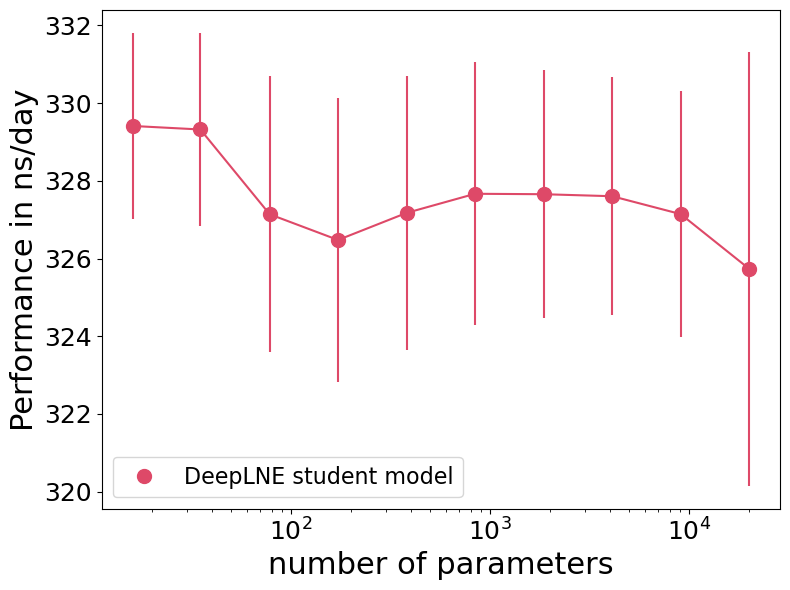

In [12]:
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=10)


magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  

fig, ax = plt.subplots(1, figsize=(8,6), dpi=100)
plt.plot(nparameters,performance_values_mean,'o',color=new_magma(0.5),markersize=10,label=r'DeepLNE student model')
plt.errorbar(nparameters,performance_values_mean,yerr=performance_values_std,color=new_magma(0.5),markersize=10)
plt.ylabel(r'Performance in ns/day', fontsize=22)
plt.xlabel('number of parameters', fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')

ax.legend(loc='lower left',fontsize=16, markerscale=1)


plt.tight_layout()
plt.show()

In [13]:
np.save('Benchmark/RNA_nparameters.npy', nparameters)
np.save('Benchmark/RNA_mean.npy',performance_values_mean)
np.save('Benchmark/RNA_std.npy',performance_values_std)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
import plumed
from scipy.interpolate import griddata

torch.manual_seed(42)

In [2]:
tri_nparameters=np.load('../Trialanine/Benchmark/Trialanine_nparameters.npy')
tri_performance_values_mean=np.load('../Trialanine/Benchmark/Trialanine_mean.npy')
tri_performance_values_std=np.load('../Trialanine/Benchmark/Trialanine_std.npy')

nparameters=np.load('Benchmark/RNA_nparameters.npy')
performance_values_mean=np.load('Benchmark/RNA_mean.npy')
performance_values_std=np.load('Benchmark/RNA_std.npy')

In [4]:
print(np.max(tri_performance_values_std))
print(np.max(performance_values_std))

387.789025144164
5.586128711836383


In [7]:
print(np.min(tri_nparameters))
print(np.min(nparameters))
print(np.max(tri_nparameters))
print(np.max(nparameters))

16
16
20000
20000


In [8]:
print(tri_performance_values_mean[0],tri_performance_values_mean[-1])
print(performance_values_mean[0],performance_values_mean[-1])

3959.785 3774.064942528735
329.41316666666665 325.73539080459767


In [5]:
#speed up trialanine
np.max(tri_performance_values_mean)/201.063

19.863286924115975

In [6]:
#speed up RNA
np.max(performance_values_mean)/119.19


2.763765136896272

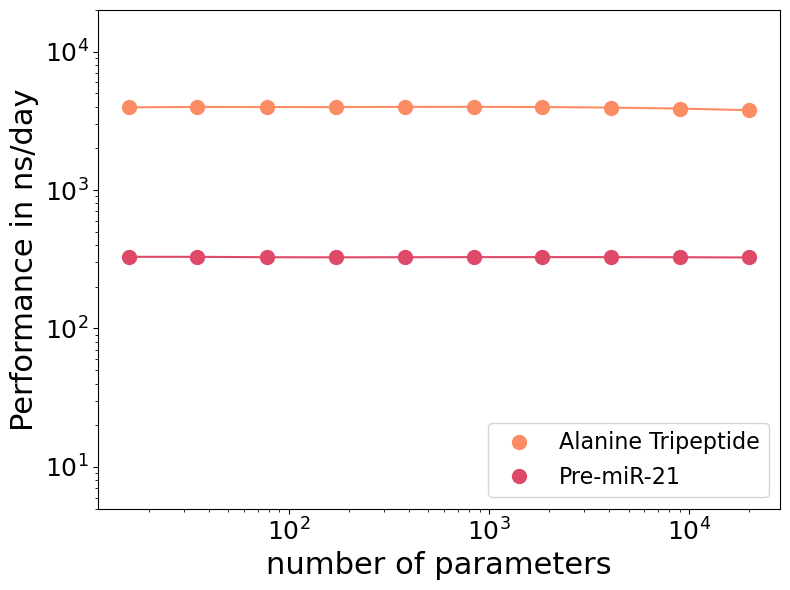

In [3]:
#for the 3 ladders plot ns/day, vs nparametersplt.plot(performance_values)
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=10)


magma = plt.colormaps["magma_r"]
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  

fig, ax = plt.subplots(1, figsize=(8,6), dpi=100)
plt.plot(tri_nparameters,tri_performance_values_mean,'o',color=new_magma(0.3),markersize=10,label=r'Alanine Tripeptide')
plt.errorbar(tri_nparameters,tri_performance_values_mean,yerr=tri_performance_values_std,color=new_magma(0.3),markersize=10)
plt.plot(nparameters,performance_values_mean,'o',color=new_magma(0.5),markersize=10,label=r'Pre-miR-21')
plt.errorbar(nparameters,performance_values_mean,yerr=performance_values_std,color=new_magma(0.5),markersize=10)
plt.ylabel(r'Performance in ns/day', fontsize=22)
plt.xlabel('number of parameters', fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(5,20000)

ax.legend(loc='lower right',fontsize=16, markerscale=1)


plt.tight_layout()
plt.show()

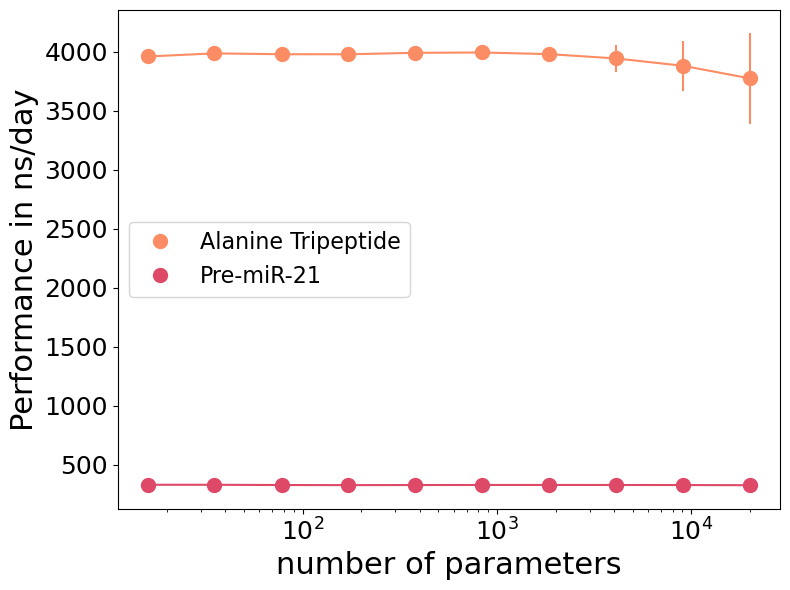

In [18]:
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=0, vmax=10)


magma = plt.colormaps["magma_r"] 
new_magma = mcolors.ListedColormap(magma(np.linspace(0.0, 0.8, 256)))  

fig, ax = plt.subplots(1, figsize=(8,6), dpi=100)
plt.plot(tri_nparameters,tri_performance_values_mean,'o',color=new_magma(0.3),markersize=10,label=r'Alanine Tripeptide')
plt.errorbar(tri_nparameters,tri_performance_values_mean,yerr=tri_performance_values_std,color=new_magma(0.3),markersize=10)
plt.plot(nparameters,performance_values_mean,'o',color=new_magma(0.5),markersize=10,label=r'Pre-miR-21')
plt.errorbar(nparameters,performance_values_mean,yerr=performance_values_std,color=new_magma(0.5),markersize=10)
plt.ylabel(r'Performance in ns/day', fontsize=22)
plt.xlabel('number of parameters', fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')

ax.legend(loc='center left',fontsize=16, markerscale=1)


plt.tight_layout()
plt.show()